In [134]:
import pandas as pd
data = pd.read_csv(r'../data/spi_vci_daily.csv').iloc[:, 1:]

/tmp/ipykernel_1142266/73208286.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, df in data.drop(columns={'precp_idx','land_cat','time'}).groupby(['product']):


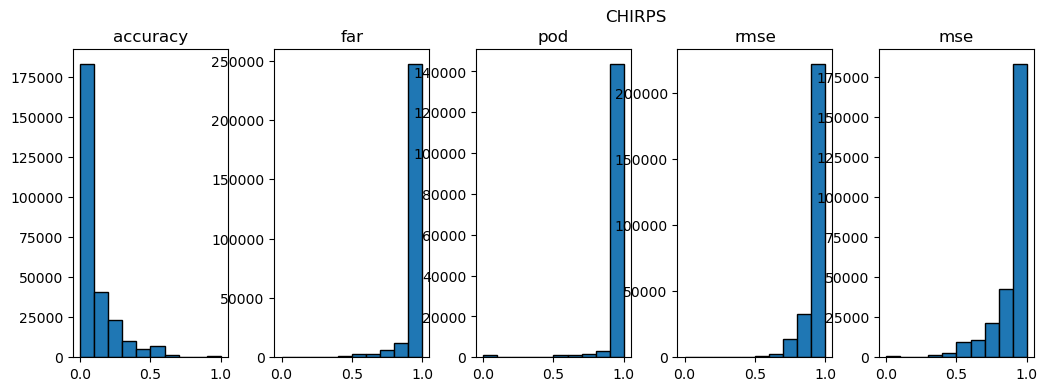

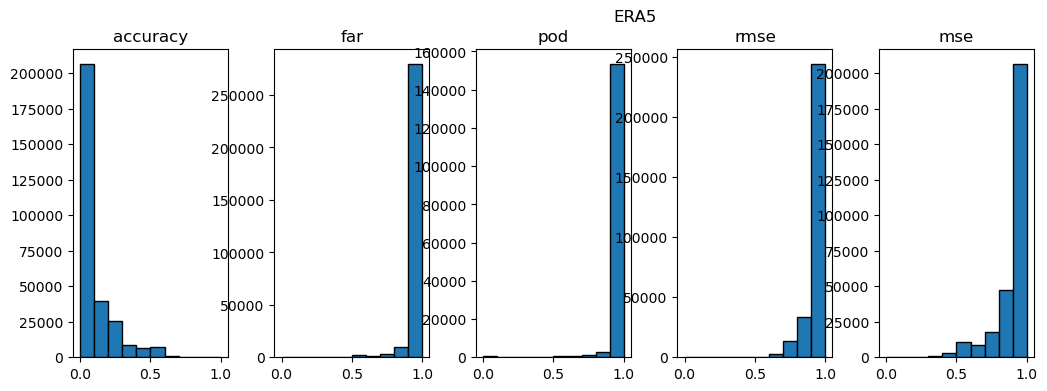

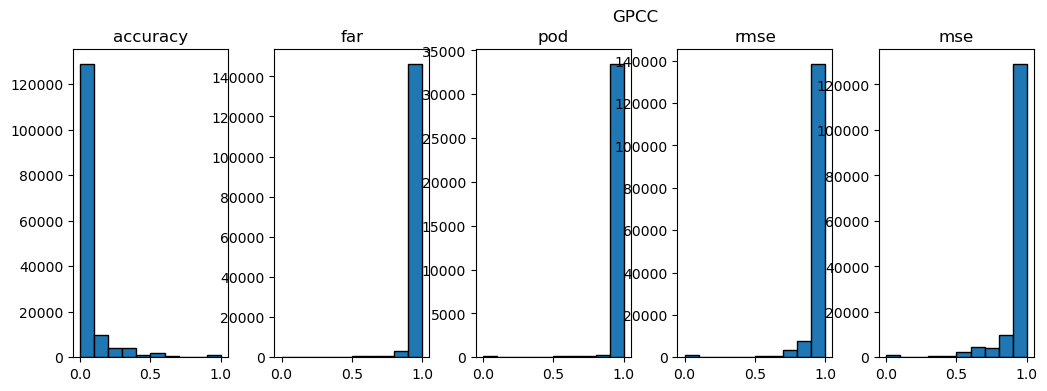

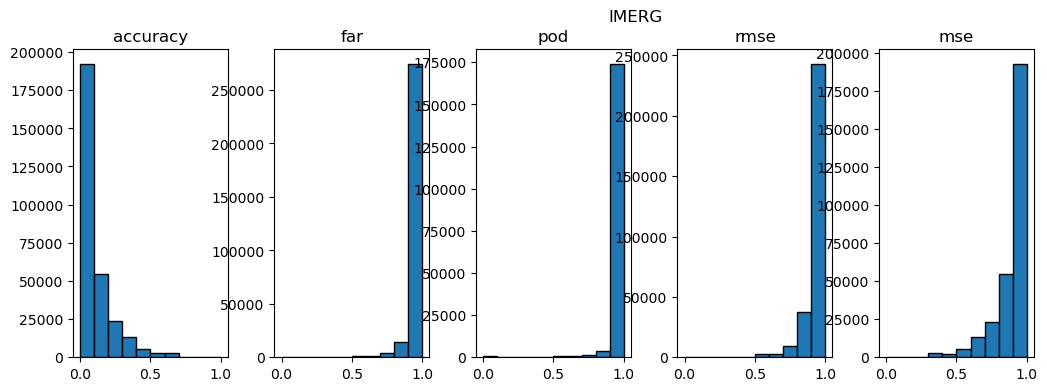

In [2]:
for idx, df in data.drop(columns={'precp_idx','land_cat','time'}).groupby(['product']):
        # plot a hist for each column
    axes = df.hist(layout=(1, 6), figsize=(15, 4), ec='k', grid=False)

    #df.plot(layout=(1, 6), kind='kde', ax=axes, secondary_y=True)

    # extract the figure object from the array of axes
    fig = axes[0][0].get_figure()

    # add the gender as the title
    fig.suptitle(idx)

In [135]:
sub_df = data.loc[data['precp_idx']=="spi_gamma_30"]

In [136]:
import seaborn as sns
df = sub_df.groupby(['description','product']).mean()[['far','pod','accuracy']]
df.style.background_gradient(cmap='Blues')


/tmp/ipykernel_1779641/3295850026.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sub_df.groupby(['description','product']).mean()[['far','pod','accuracy']]


<Figure size 640x480 with 0 Axes>

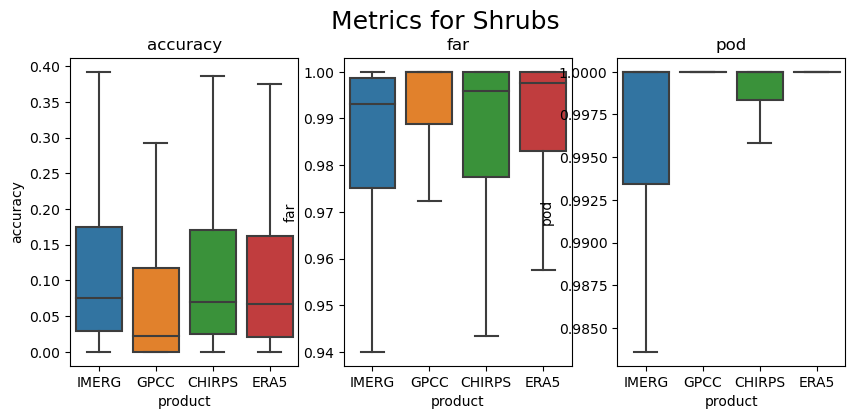

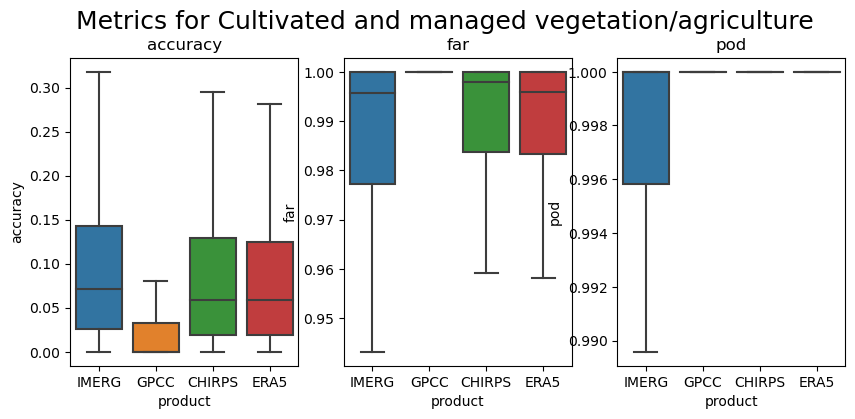

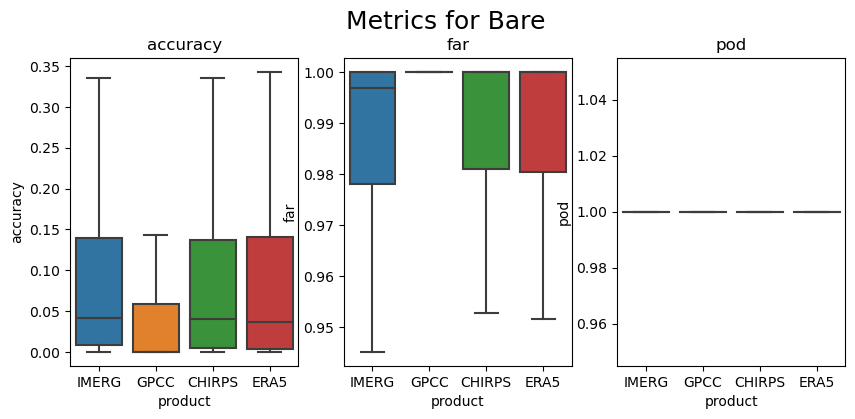

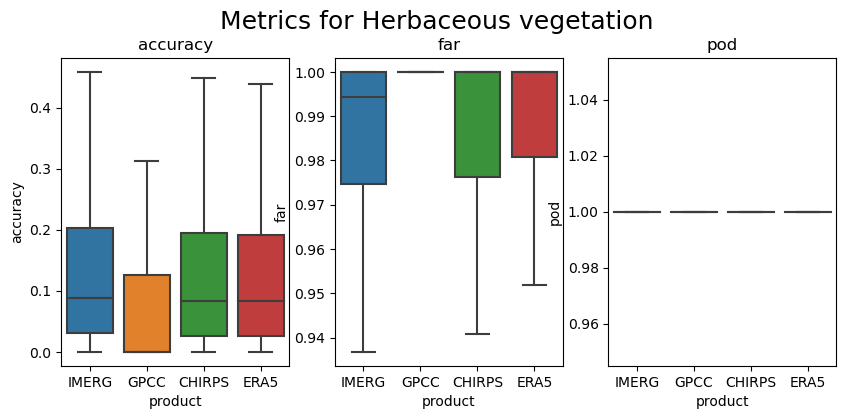

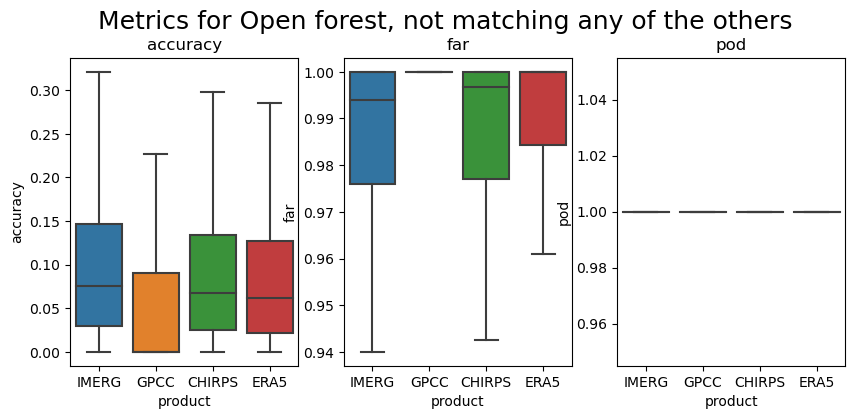

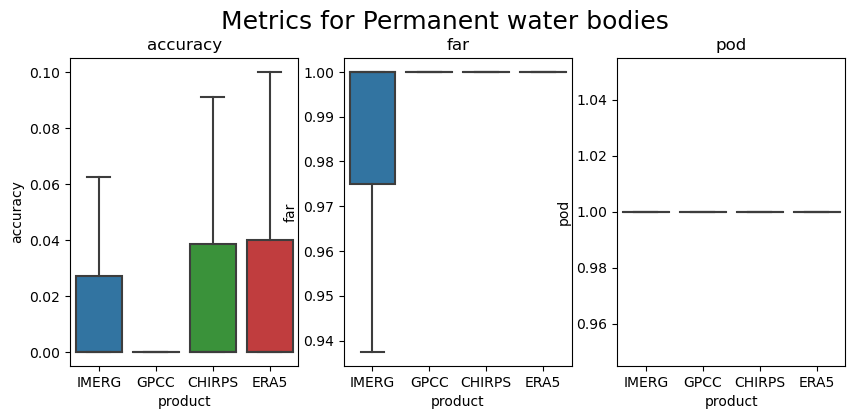

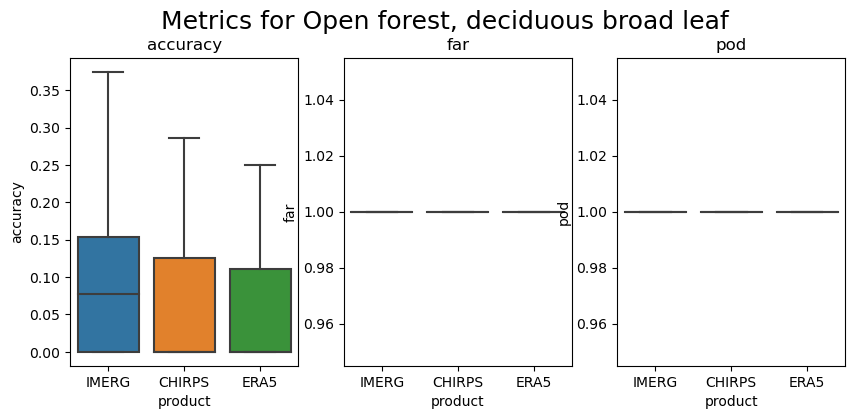

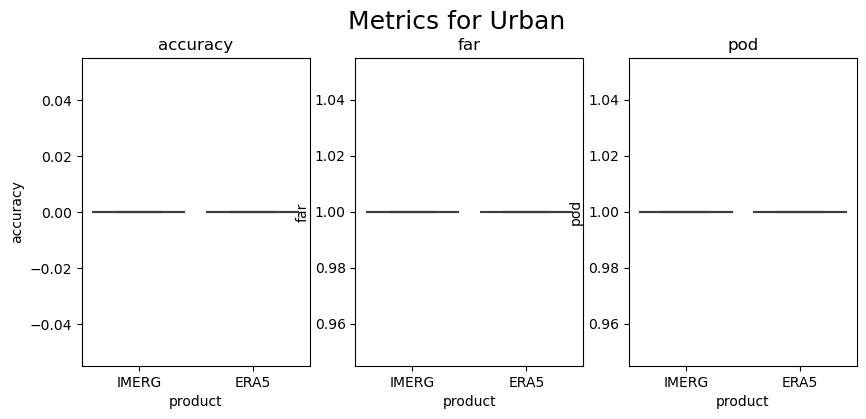

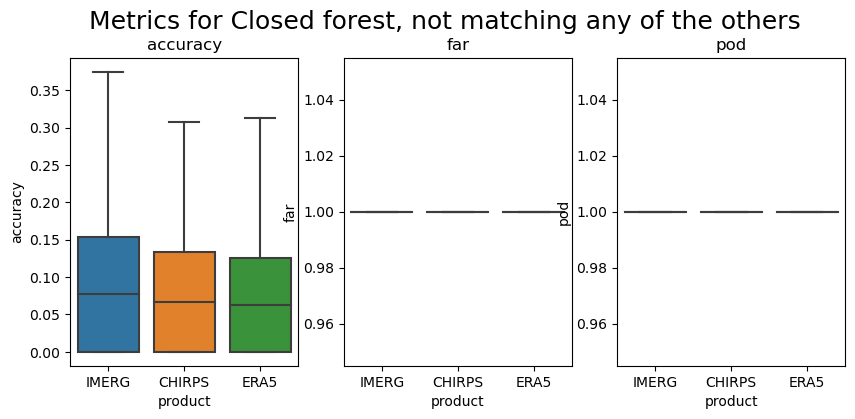

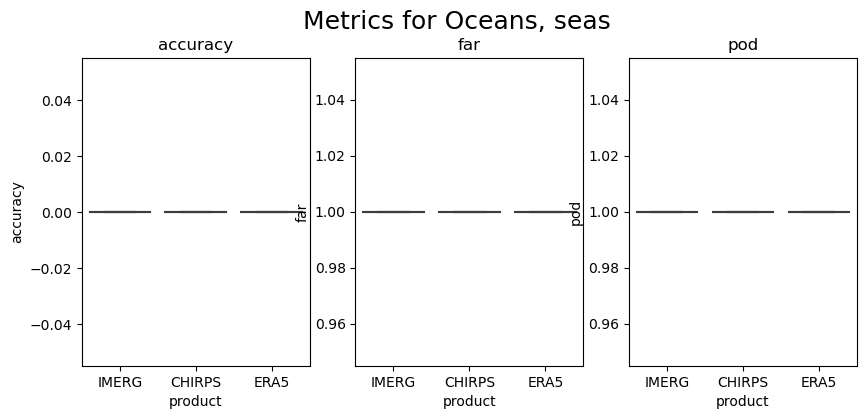

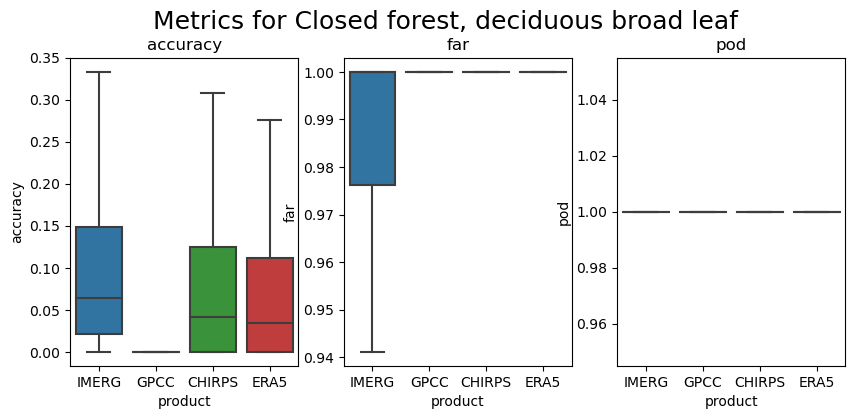

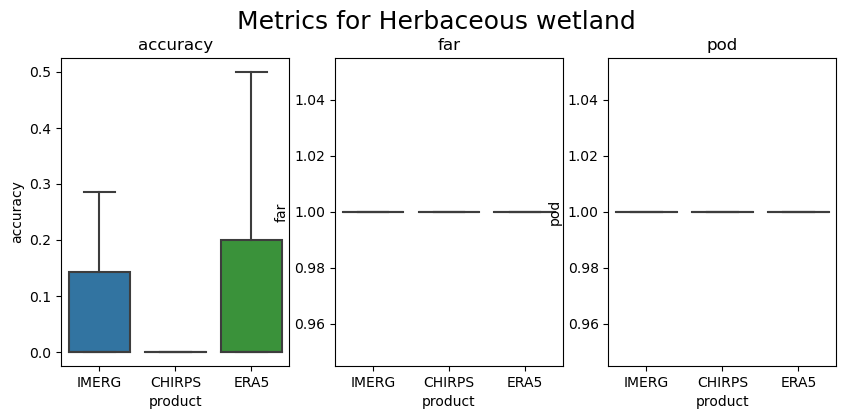

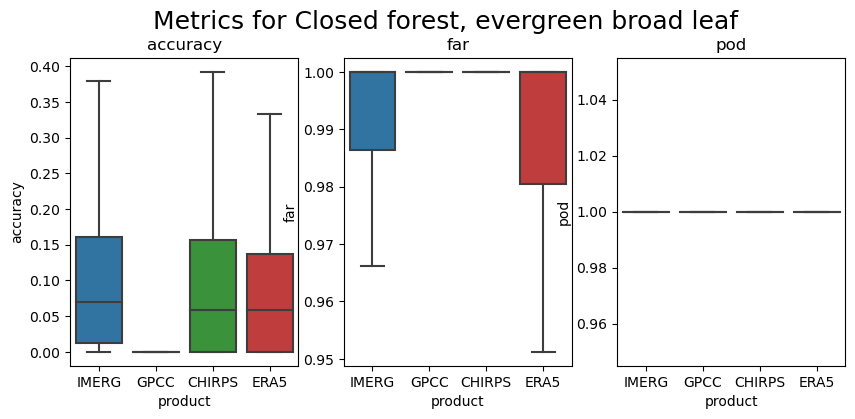

In [139]:
import matplotlib.pyplot as plt

plt.subplots_adjust(wspace=0.8)
plt.subplots_adjust(hspace=0.5)

metrics = ["accuracy","far","pod"]

#countries = ['Kenya','Ethiopia','Somalia']
for i, soil in enumerate(sub_df["description"].unique()):
    #for metric in ['accuracy']:
    fig, axes = plt.subplots(1, 3, figsize=(10,4))
    for metric, ax in zip(metrics, axes.ravel()):
        plt.suptitle(f"Metrics for {soil}", fontsize=18, y=1)
        new_df = sub_df.loc[(sub_df["description"]==soil)].dropna(subset=[metric])
        if len(new_df)>0:
            sns.boxplot(data = new_df, y=metric, x='product', ax=ax, showfliers=False)
        ax.set_title(f"{metric}")
    plt.show()

In [1]:
import xarray as xr
from p_drought_indices.functions.function_clns import load_config, cut_file, subsetting_pipeline
import os
from p_drought_indices.functions.function_clns import crop_get_spi, crop_get_thresh, prepare
from p_drought_indices.analysis.visualizations.viz_vci_spi import box_plot_year, multiple_spi_boxplots, get_subplot_year, get_year_compare
import numpy as np
import warnings
from matplotlib import gridspec
import matplotlib.patches as mpatches
from matplotlib import gridspec
import calendar
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio

warnings.filterwarnings('ignore')


CONFIG_PATH = "../config.yaml"
config = load_config(CONFIG_PATH)
ds_ndvi = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'smoothed_ndvi_1.nc'))
vci = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'vci_1D.nc'))
res_ds = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'percentage_ndvi.nc'))

config_directories = [config['SPI']['IMERG']['path'], config['SPI']['GPCC']['path'], config['SPI']['CHIRPS']['path'], config['SPI']['ERA5']['path']]
config_dir_precp = [config['PRECIP']['IMERG']['path'], config['PRECIP']['GPCC']['path'], config['PRECIP']['CHIRPS']['path'], config['PRECIP']['ERA5']['path'],  config['PRECIP']['TAMSTAT']['path']]
            

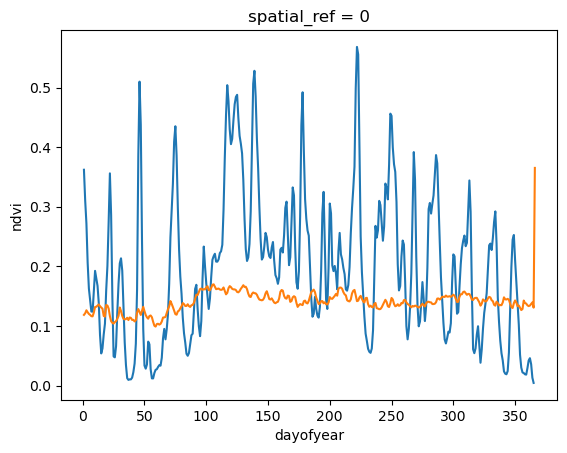

In [9]:
year = 2011

mean_res = res_ds.groupby("time.dayofyear").mean(["time"]).mean(["lat","lon"])
res_ds_sub = res_ds.sel(time=res_ds.time.dt.year.isin([year]))
res_ds_mean = res_ds_sub.groupby("time.dayofyear").mean(["lat","lon"])
mean_res["time"]= res_ds_mean["time"]
res_ds_mean["ndvi"].plot(x="dayofyear")
mean_res["ndvi"].plot(x="dayofyear")
plt.show()

### Plotting VCI by year

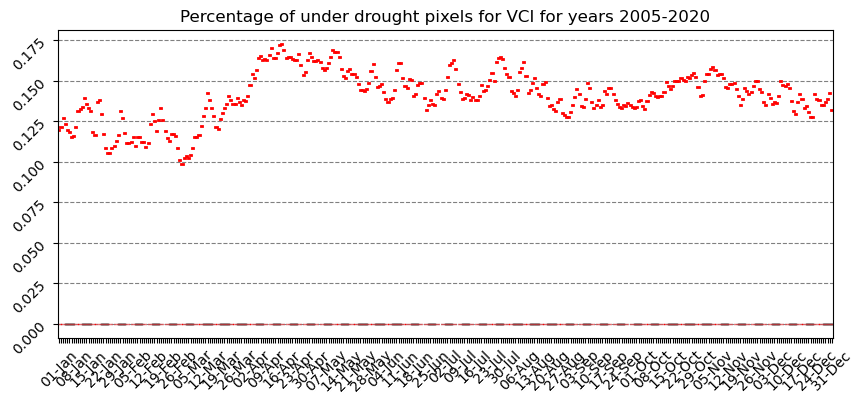

In [62]:
res_ds = crop_get_thresh(vci["ndvi"]).to_dataset()
title="Percentage of under drought pixels for VCI for years 2005-2020"
box_plot_year(res_ds, title = title, year=year, show_means=True, figsize=(10,4))

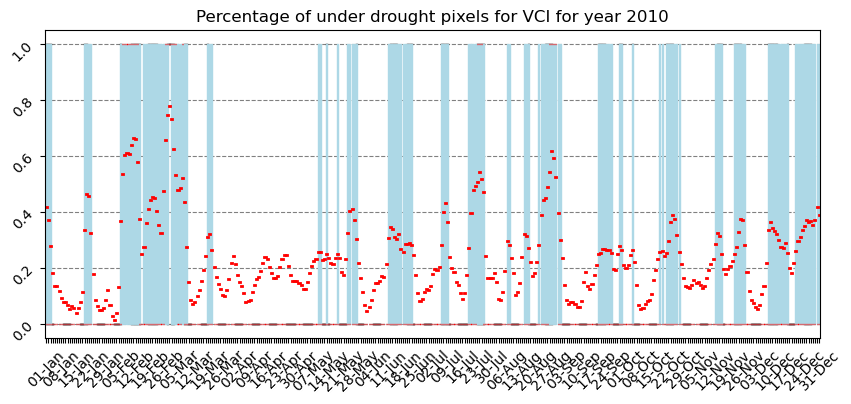

In [60]:
year =2010
subset_res = res_ds.sel(time=res_ds.time.dt.year.isin([year]))
title=f"Percentage of under drought pixels for VCI for year {year}"
box_plot_year(subset_res, title = title, year=year, show_means=True, figsize=(10,4))

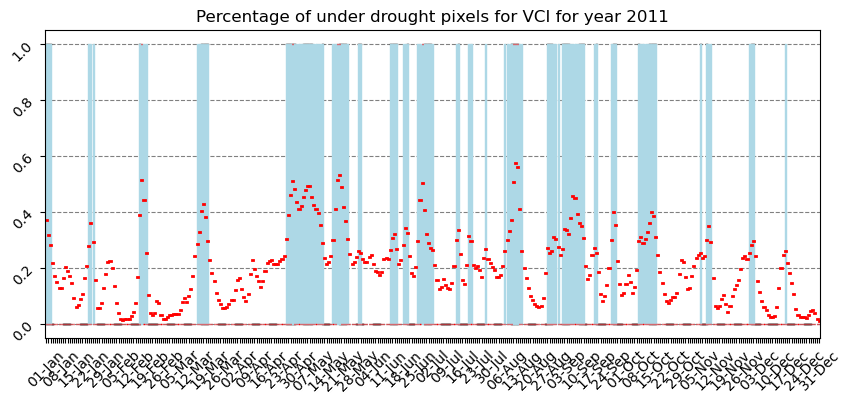

In [61]:
year =2011
subset_res = res_ds.sel(time=res_ds.time.dt.year.isin([year]))
title=f"Percentage of under drought pixels for VCI for year {year}"
box_plot_year(subset_res, title = title, year=year, show_means=True, figsize=(10,4))

### Visualize SPI by product 

In [1]:
CONFIG_PATH = "../config.yaml"
from p_drought_indices.analysis.visualizations.viz_vci_spi import loop_soil
loop_soil(CONFIG_PATH)


Starting analysis for Herbaceous vegetation


: 

: 

In [4]:
import pandas as pd
from datetime import datetime
import time
from p_drought_indices.analysis.visualizations.viz_vci_spi import get_subplot_year, adjust_full_list, str_month

import xarray as xr
from p_drought_indices.functions.function_clns import load_config, prepare, subsetting_pipeline
import os
from p_drought_indices.functions.function_clns import crop_get_spi, crop_get_thresh
from p_drought_indices.analysis.visualizations.viz_vci_spi import box_plot_year, get_xarray_time_subset, multiple_spi_boxplots, get_subplot_year, subsetting_whole
import numpy as np
import warnings
from matplotlib import gridspec
import matplotlib.patches as mpatches
from matplotlib import gridspec
import calendar
import matplotlib.pyplot as plt
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_precp_2009_event,plot_veg_2009_event, plot_spi_2009_event
from p_drought_indices.ancillary_vars.esa_landuse import get_level_colors, get_cover_dataset


warnings.filterwarnings('ignore')


CONFIG_PATH = "../config.yaml"
config = load_config(CONFIG_PATH)
ds_ndvi = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'smoothed_ndvi_1.nc'))
vci = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'vci_1D.nc'))
res_ds = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'percentage_ndvi.nc'))

config_directories = [config['SPI']['IMERG']['path'], config['SPI']['GPCC']['path'], config['SPI']['CHIRPS']['path'], config['SPI']['ERA5']['path'], config['SPI']['MSWEP']['path'] ]
config_dir_precp = [config['PRECIP']['IMERG']['path'],config['PRECIP']['CHIRPS_05']['path'], config['PRECIP']['GPCC']['path'], config['PRECIP']['CHIRPS']['path'], config['PRECIP']['ERA5']['path'],  config['PRECIP']['TAMSTAT']['path'],config['PRECIP']['MSWEP']['path']]
            

prod = "CHIRPS"
late = 60
product_dir = [f for f in config_dir_precp if prod in f][0]
list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
precp_ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
variable = [var for var in precp_ds.data_vars if var!= "spatial_ref"][0]

spi_dir = [f for f in config_directories if prod in f][0]
var_target = f"spi_gamma_{late}"
files = [f for f in os.listdir(spi_dir) if var_target in f ]
spi_ds = xr.open_dataset(os.path.join(spi_dir, files[0]))


from p_drought_indices.ancillary_vars.esa_landuse import get_level_colors, get_cover_dataset

ndvi_res =prepare(ds_ndvi)
img_path =r'../data/images/chirps_esa'
ds_cover = get_cover_dataset(CONFIG_PATH, ndvi_res["ndvi"], img_path)

cmap, levels = get_level_colors(ds_cover["Band1"].isel(time=0))
ds_cover.isel(time=0)["Band1"].plot(colors=cmap, levels=levels)

def clean_multi_nulls(ds):
    # Create a MultiIndex
    ds = ds.stack(pixel=("lat", "lon"))
    # Drop the pixels that only have NA values.
    ds = ds.dropna("pixel", how="all")
    ds = ds.unstack(["pixel"]).sortby(["lat","lon"])
    return ds

img_path =r'../data/images/chirps_esa'
base_path = r'../data/images/soil_type'
soil_types = np.unique(ds_cover["Band1"].values)[:-1]

values_land_cover = {0	:'Unknown', 20:	'Shrubs',30:	'Herbaceous vegetation',40:	'Cultivated and managed vegetation/agriculture',
                        50:	'Urban',60:	'Bare',70:	'Snow and ice',80:	'Permanent water bodies',90:	'Herbaceous wetland',100: 'Moss and lichen',111: 'Closed forest, evergreen needle leaf',
                        112: 'Closed forest, evergreen broad leaf',115: 'Closed forest, mixed',125: 'Open forest, mixed',113: 'Closed forest, deciduous needle leaf',
                        114: 'Closed forest, deciduous broad leaf',116: 'Closed forest, not matching any of the others',121: 'Open forest, evergreen needle leaf',122: 'Open forest, evergreen broad leaf',
                        123: 'Open forest, deciduous needle leaf',124: 'Open forest, deciduous broad leaf',126: 'Open forest, not matching any of the others',200: 'Oceans, seas'}


precp_ds =prepare(precp_ds)
ds_cover_precp = get_cover_dataset(CONFIG_PATH, precp_ds[variable], img_path)

spi_ds =prepare(spi_ds).transpose("time","lat","lon")
ds_cover_spi = get_cover_dataset(CONFIG_PATH, spi_ds[var_target], img_path)

ds_ndvi =prepare(ds_ndvi)
ds_cover_ndvi = get_cover_dataset(CONFIG_PATH, ndvi_res["ndvi"], img_path)

for soil_type in soil_types[1:]:
    soil_name = values_land_cover[soil_type]
    print(f"Starting analysis for {soil_name}")

    ### Raw precipitation
    ds_soil = ds_cover_precp[variable].where(ds_cover_precp["Band1"]==soil_type).to_dataset()
    ds_soil = clean_multi_nulls(ds_soil)
    path = os.path.join(base_path,"precp", soil_name, ".png")
    plot_precp_2009_event(ds_soil,variable=variable, path=path)

    ### SPI
    ds_soil = ds_cover_spi[var_target].where(ds_cover_spi["Band1"]==soil_type).to_dataset()
    ds_soil = clean_multi_nulls(ds_soil)    
    path = os.path.join(base_path,"spi", soil_name, ".png")
    plot_spi_2009_event(ds_soil,variable=var_target, path=path)

    ### NDVI   
    ds_soil = ds_cover_ndvi["ndvi"].where(ds_cover_ndvi["Band1"]==soil_type).to_dataset()
    ds_soil = clean_multi_nulls(ds_soil)
    path = os.path.join(base_path,"ndvi", soil_name, ".png")
    plot_veg_2009_event(ds_soil, path=path)

Starting analysis for Herbaceous vegetation


: 

: 

days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2009 obtaining only months 9 to 12 for boxplot
days are 365
For year 2010 obtaining only months 1 to 5 for boxplot


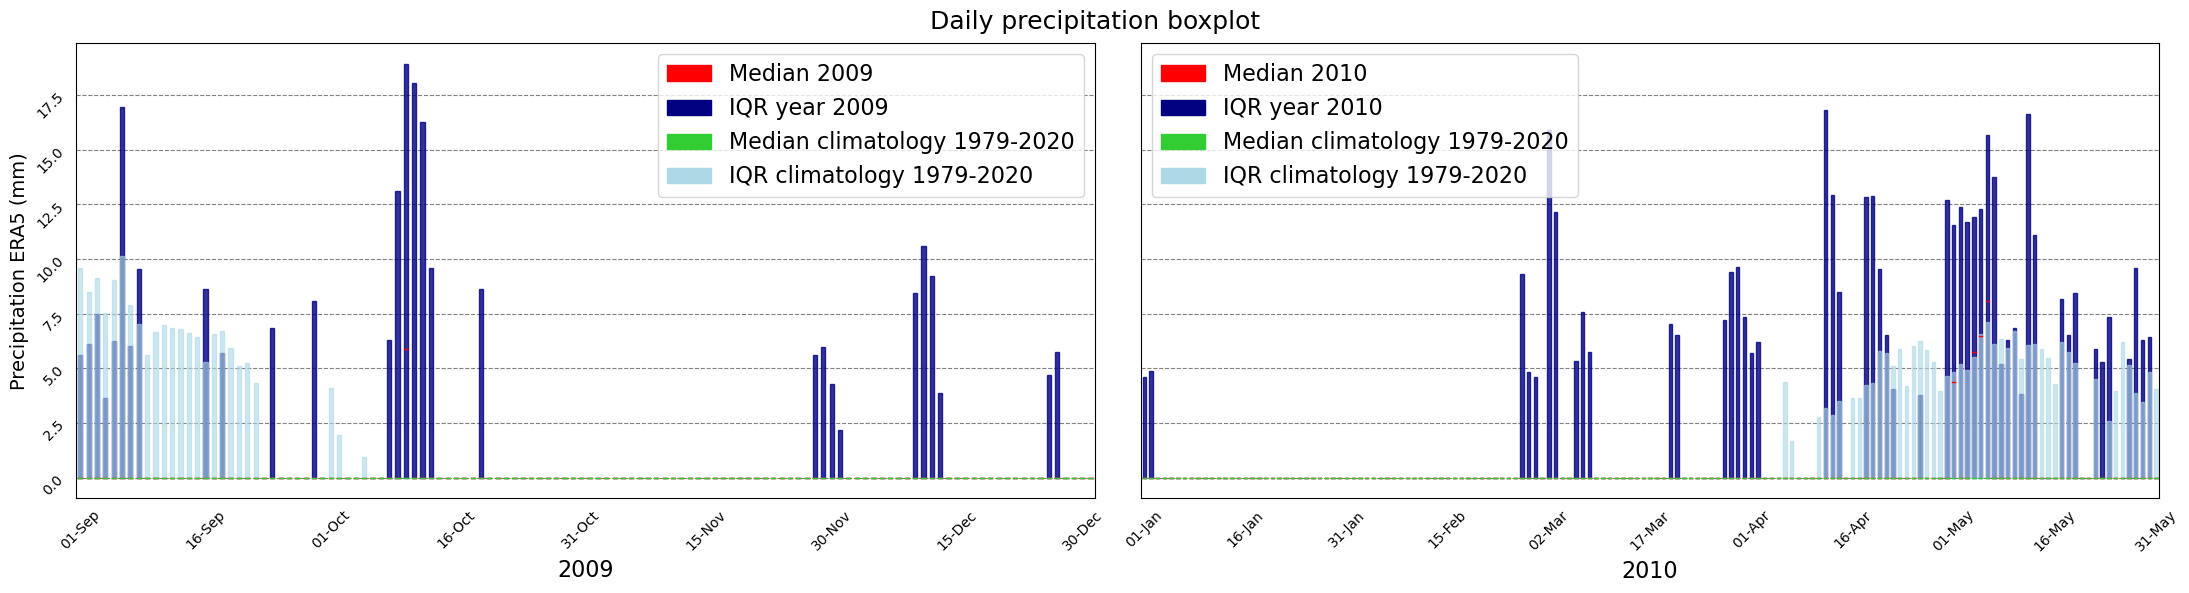

In [4]:
ndvi_res =prepare(precp_ds)
ds_cover = get_cover_dataset(CONFIG_PATH, precp_ds[variable], img_path)

ds_soil = ds_cover[variable].where(ds_cover["Band1"]==soil_type).to_dataset()
ds_soil - clean_multi_nulls(ds_soil)

plot_precp_2009_event(ds_soil,variable=variable)

days are 365
For year 2009 obtaining only months 9 to 12 for boxplot
days are 365
For year 2010 obtaining only months 1 to 5 for boxplot


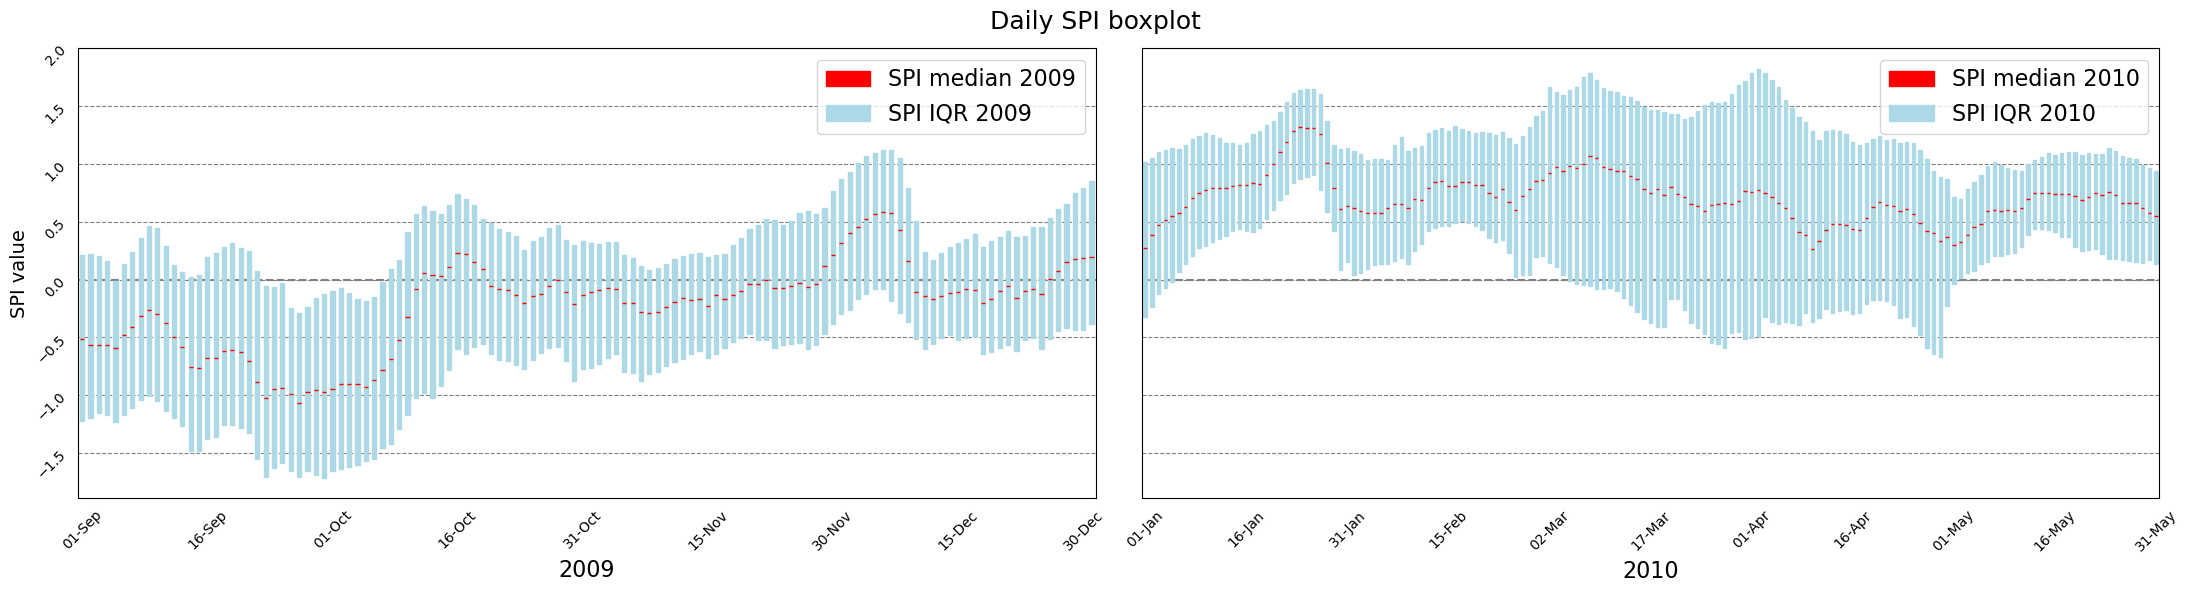

In [4]:
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_precp_2009_event, plot_spi_2009_event

spi_ds =prepare(spi_ds).transpose("time","lat","lon")
ds_cover = get_cover_dataset(CONFIG_PATH, spi_ds[var_target], img_path)

ds_soil = ds_cover[var_target].where(ds_cover["Band1"]==soil_type).to_dataset()
ds_soil = clean_multi_nulls(ds_soil)

plot_spi_2009_event(ds_soil,variable=var_target)

days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2009 obtaining only months 9 to 12 for boxplot
days are 365
For year 2010 obtaining only months 1 to 5 for boxplot


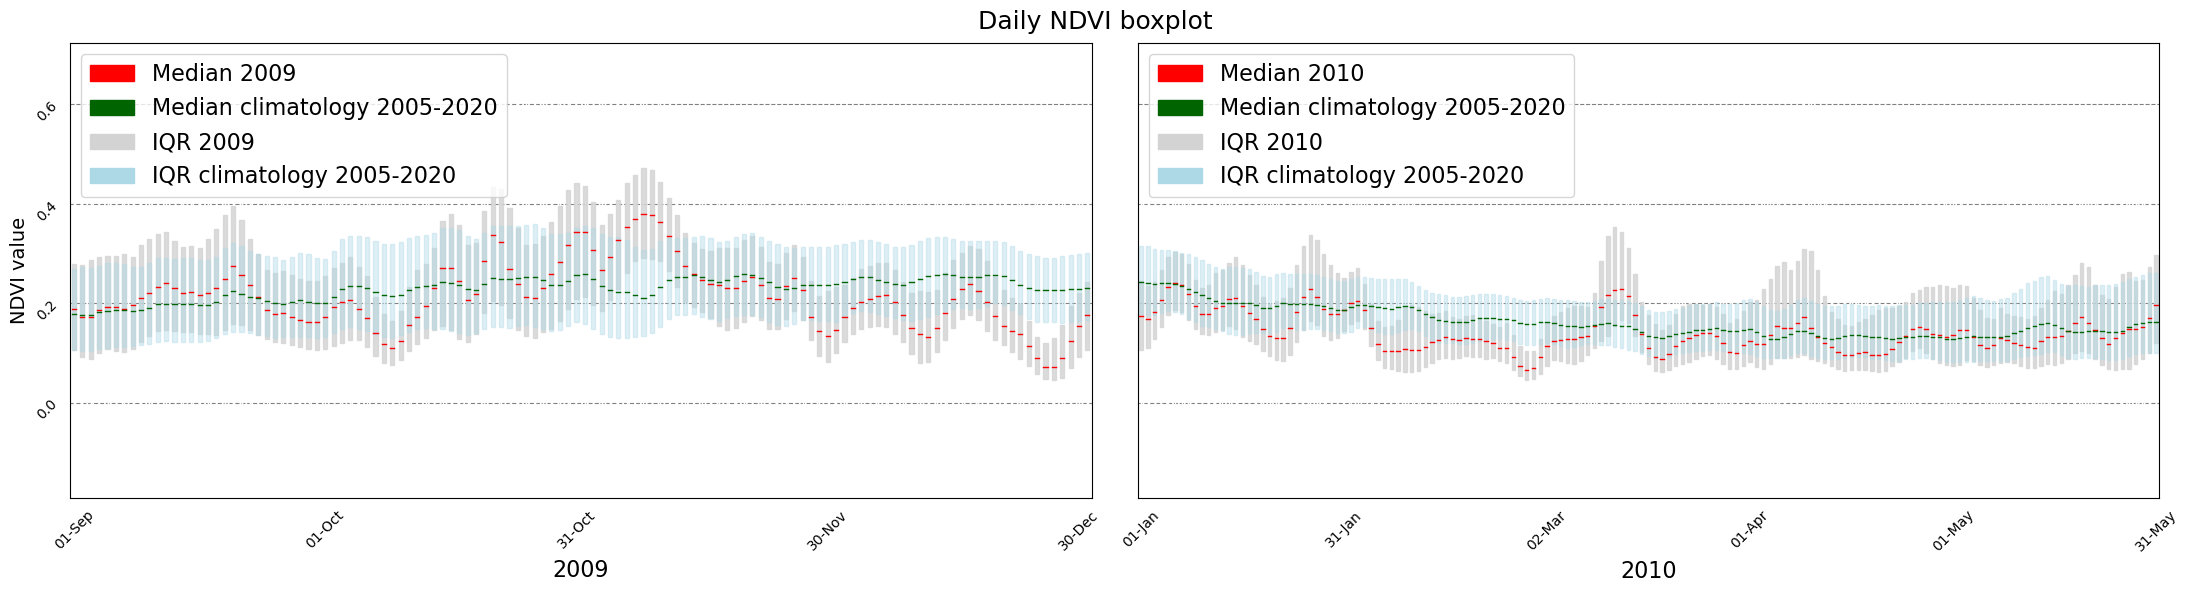

In [8]:
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_vci_2009_event, plot_veg_2009_event
from p_drought_indices.ancillary_vars.esa_landuse import get_level_colors, get_cover_dataset

ndvi_res =prepare(ds_ndvi)
ds_cover = get_cover_dataset(CONFIG_PATH, ndvi_res["ndvi"], img_path)

ds_soil = ds_cover["ndvi"].where(ds_cover["Band1"]==soil_type).to_dataset()
ds_soil = clean_multi_nulls(ds_soil)

plot_veg_2009_event(ds_soil)

In [ ]:
list_late = [30, 60, 90, 180]

for product_dir in [config['SPI']['GPCC']['path'], config['SPI']['ERA5']['path'], config['SPI']['CHIRPS']['path'], config['SPI']['IMERG']['path']]:
    print("New product plotting...")
    fig, axes = plt.subplots(nrows=2,ncols=2, figsize =(15, 7))
    list_data = []
    for late in list_late:
        var_target = f"spi_gamma_{late}"
        files = [f for f in os.listdir(product_dir) if var_target in f ]
        locals()[f"spi_{late}"] = xr.open_dataset(os.path.join(product_dir, files[0]))
        locals()[f"df_list_{late}"], list_dates = get_subplot_year(locals()[f"spi_{late}"] , var=var_target, year=np.arange(2005, 2021).tolist())
        list_data.append(locals()[f"df_list_{late}"],)
    
    product = files[0].split("_")[0]
    title = f"SPI for product {product}"
    multiple_spi_boxplots(list_late, list_data, title=title, list_dates)

### Plotting precipitation series

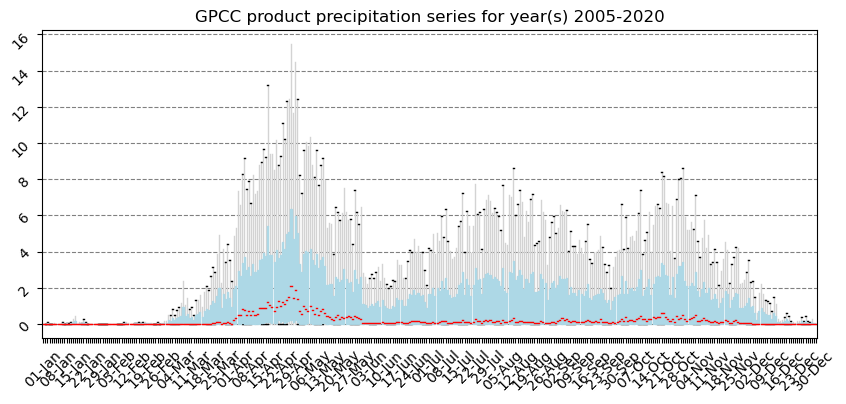

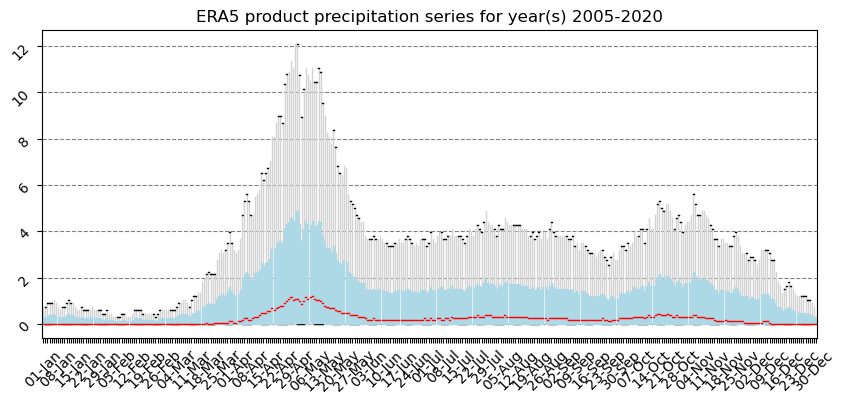

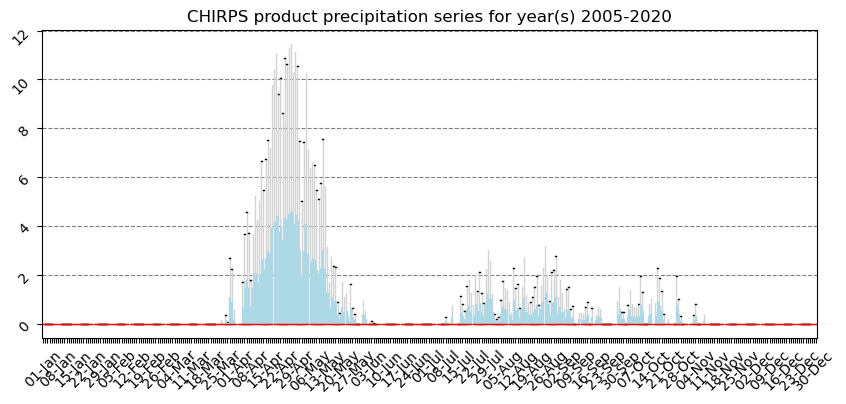

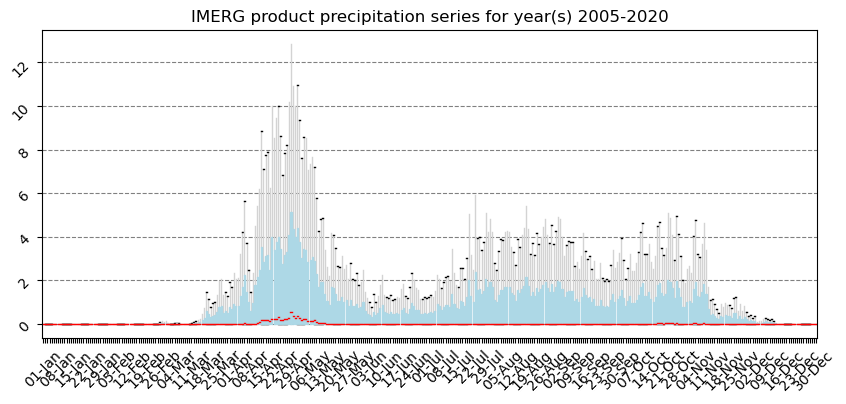

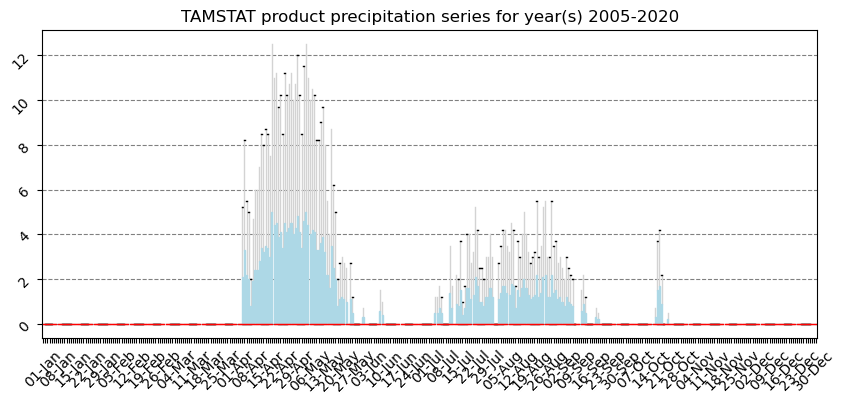

In [114]:
year = np.arange(2005, 2021).tolist()

for product_dir in config_directories:
    list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
    ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
    variable = [var for var in ds.data_vars if var!= "spatial_ref"][0]
    name = list_files[0].split("_")[0]
    box_plot_year(ds, var=variable, year=year, title=f"{name.upper()} product precipitation series for year(s) {get_year(year)}", figsize=(10,4))

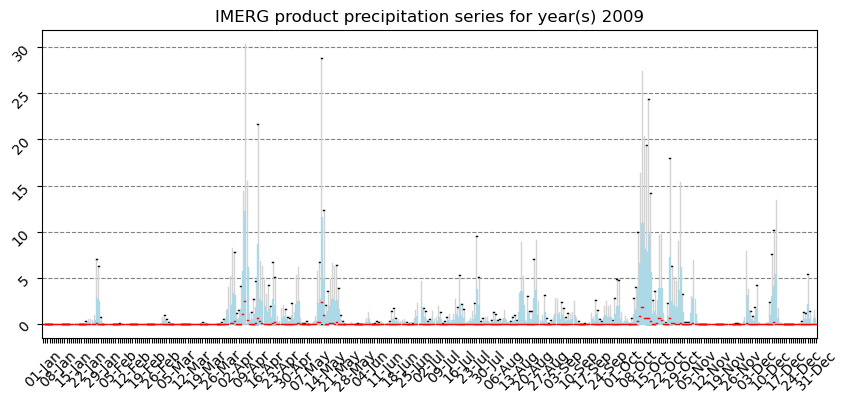

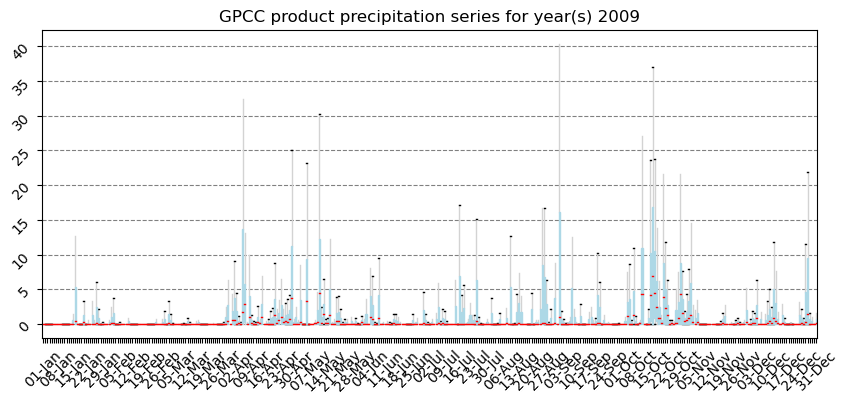

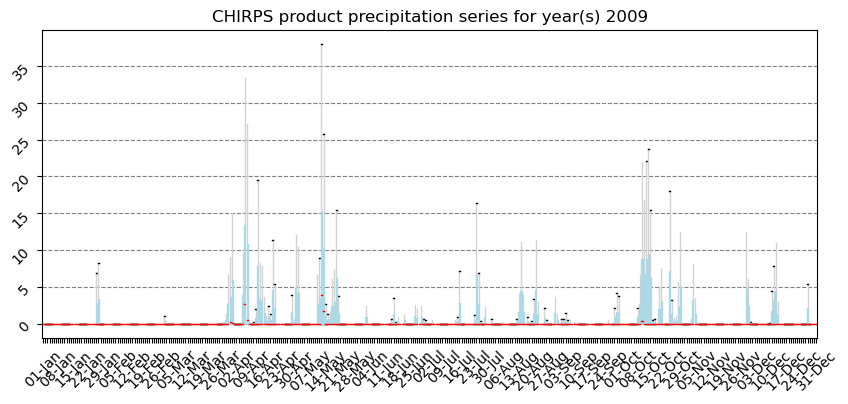

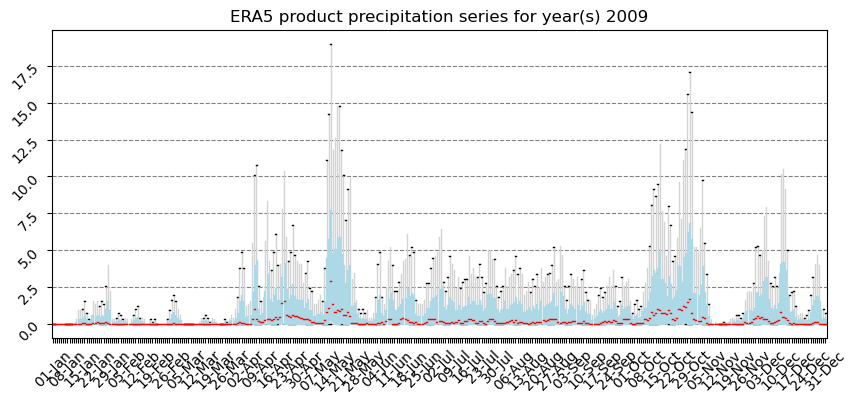

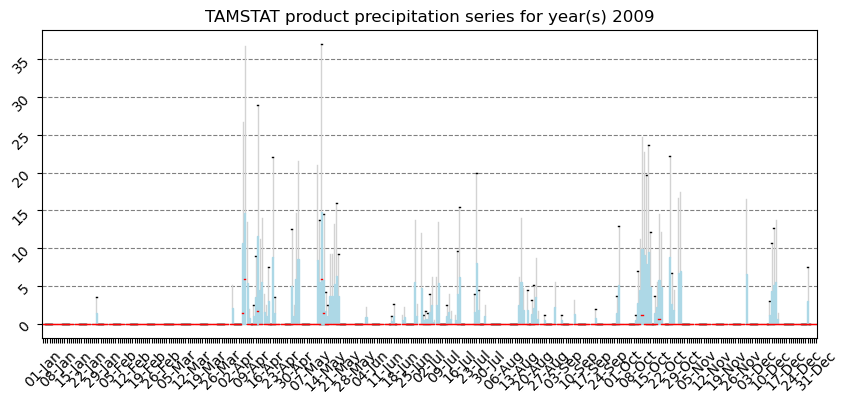

In [132]:
year = 2009
for product_dir in config_dir_precp:
    list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
    ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
    subset_ds=ds.sel(time=ds.time.dt.year.isin(year))
    variable = [var for var in ds.data_vars if var!= "spatial_ref"][0]
    name = list_files[0].split("_")[0]
    box_plot_year(subset_ds, var=variable, year=year, title=f"{name.upper()} product precipitation series for year(s) {get_year(year)}", figsize=(10,4))

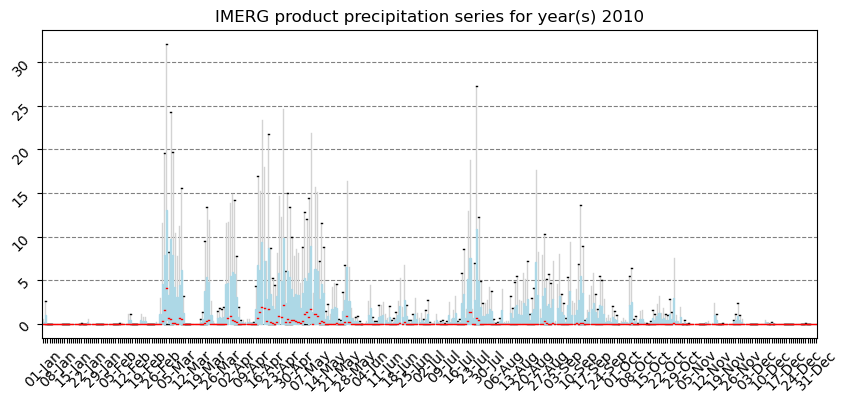

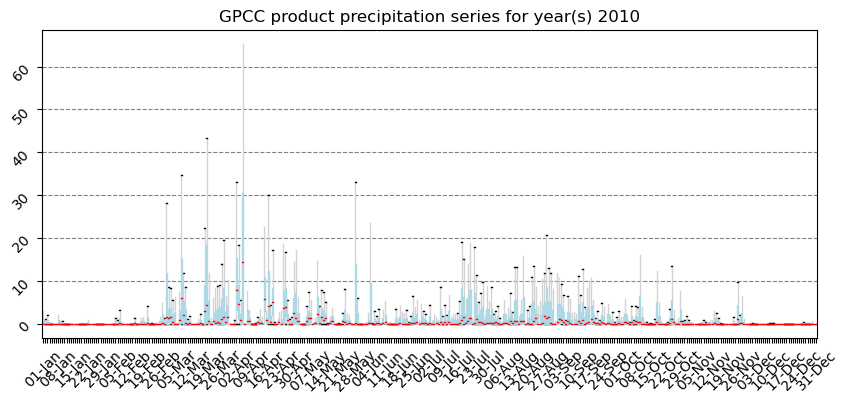

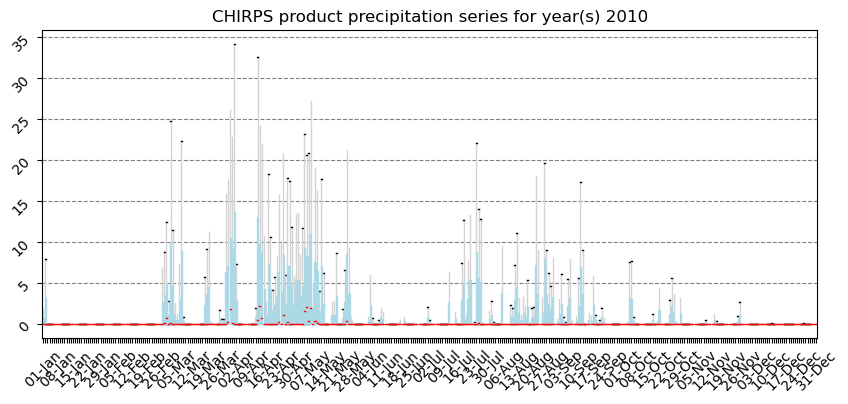

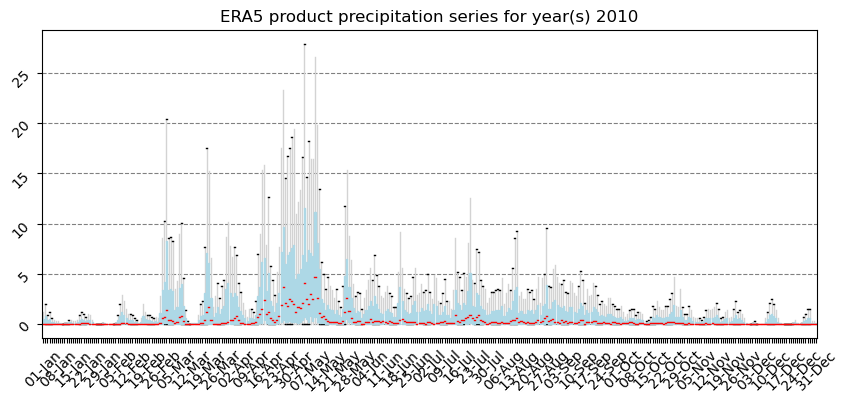

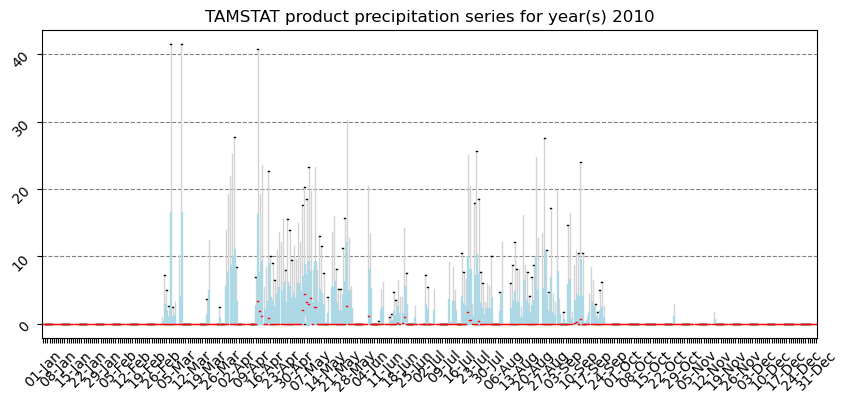

In [133]:
year = 2010
for product_dir in config_dir_precp:
    list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
    ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
    subset_ds=ds.sel(time=ds.time.dt.year.isin(year))
    variable = [var for var in ds.data_vars if var!= "spatial_ref"][0]
    name = list_files[0].split("_")[0]
    box_plot_year(subset_ds, var=variable, year=year, title=f"{name.upper()} product precipitation series for year(s) {get_year(year)}", figsize=(10,4))

Plotting new product...


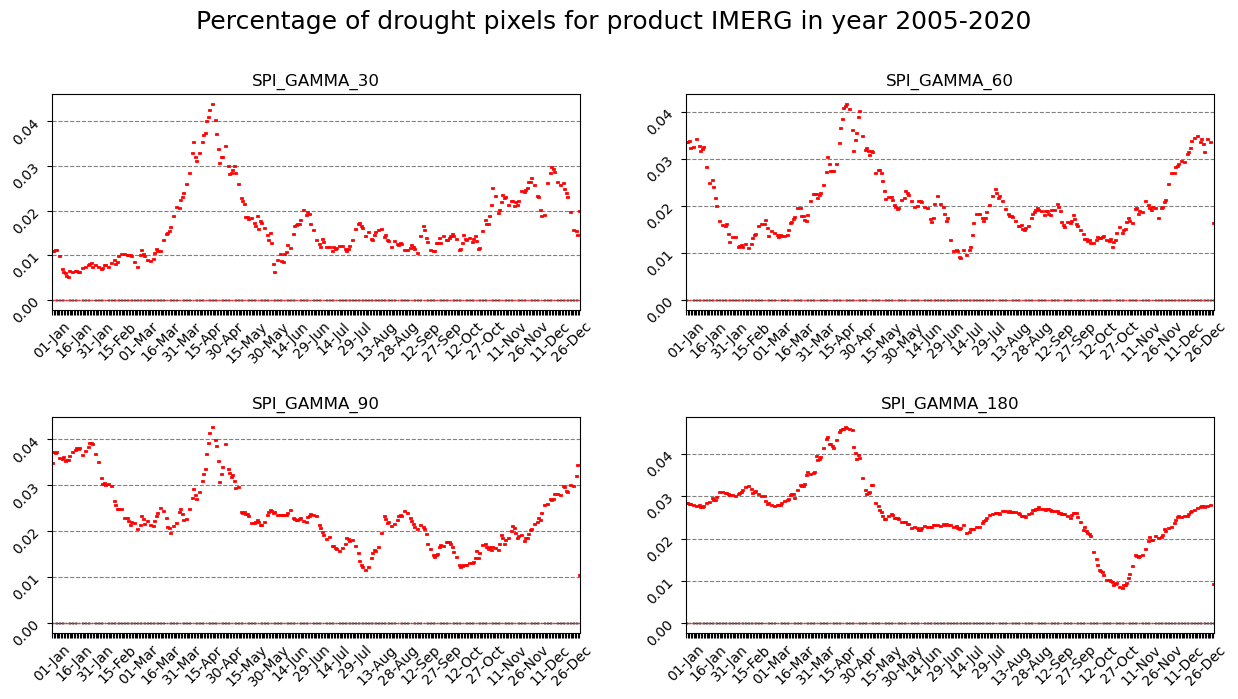

Plotting new product...


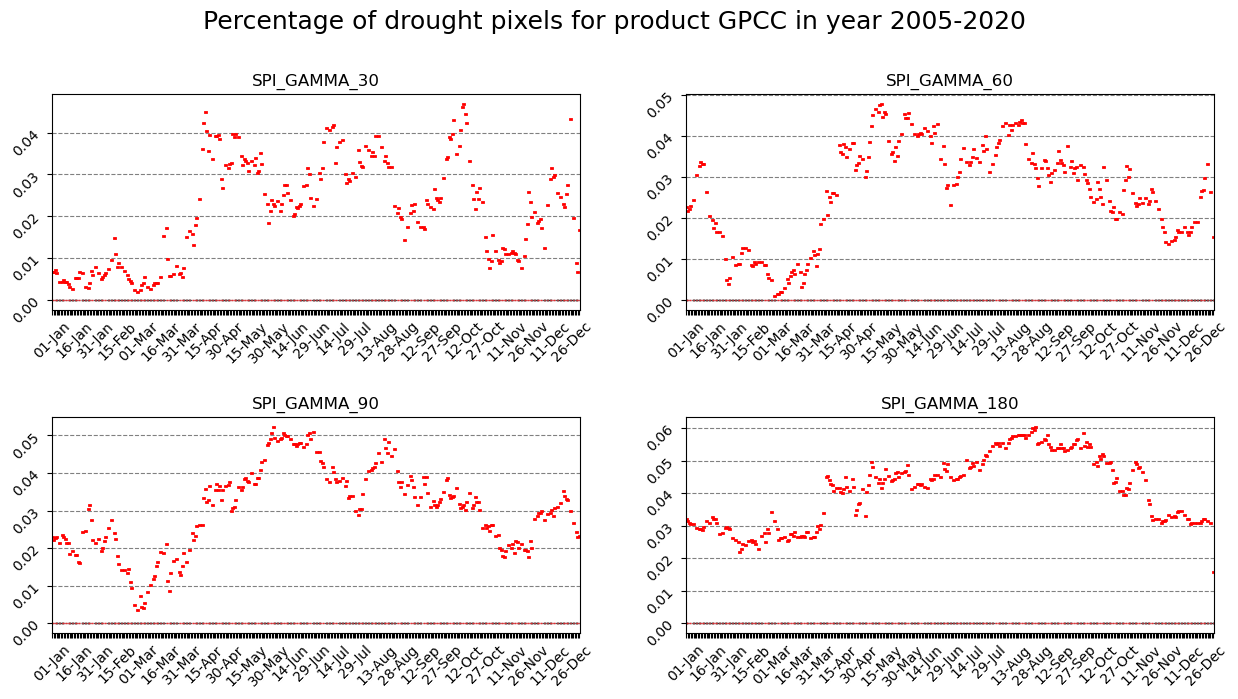

Plotting new product...


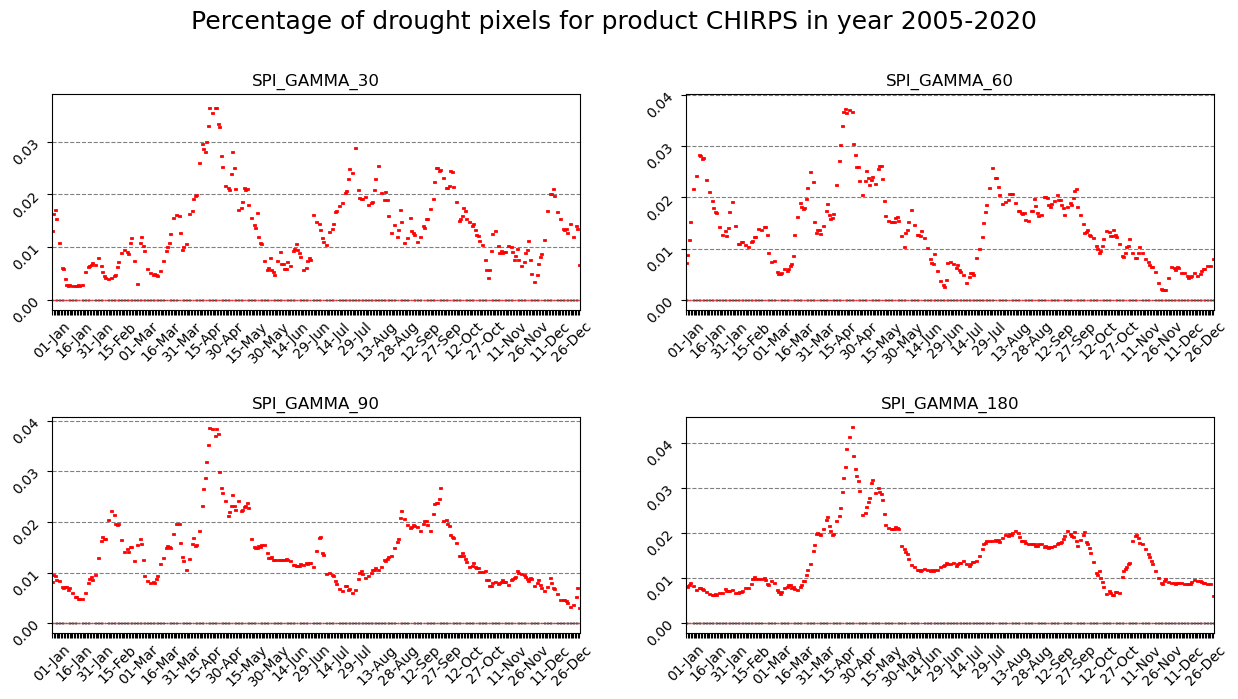

Plotting new product...


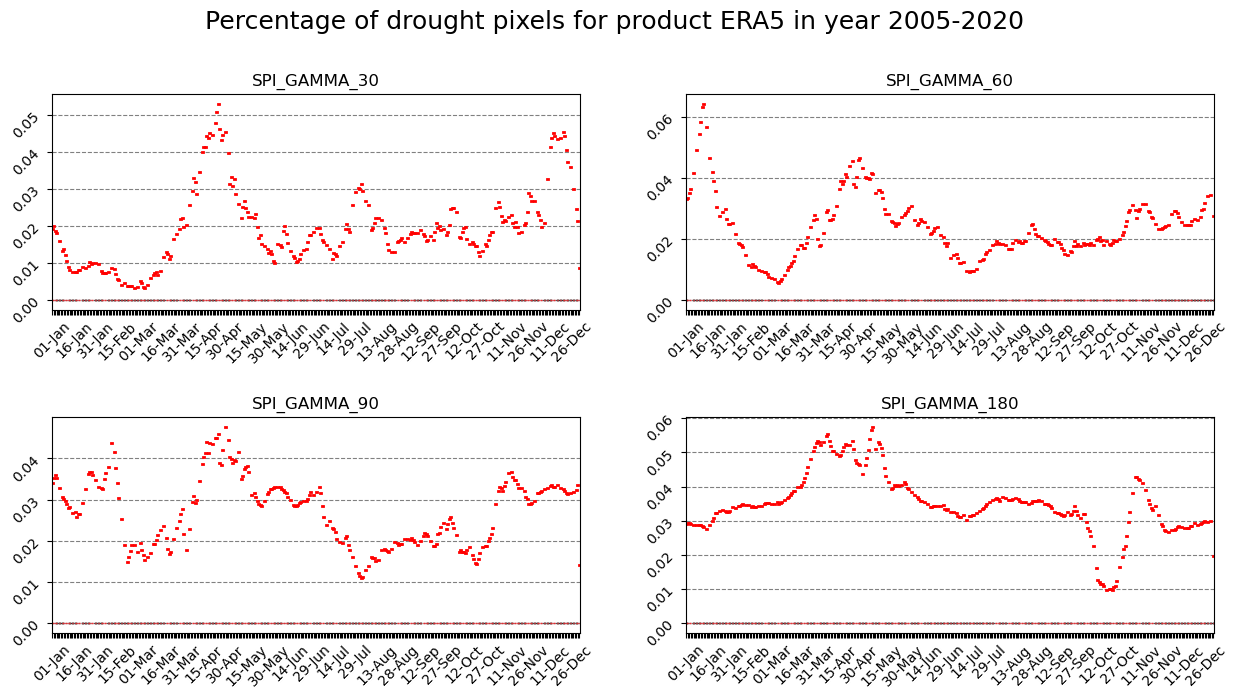

In [4]:
import numpy as np
year = np.arange(2005, 2021).tolist()
plot_products_drought_pixels(year)

Plotting new product...


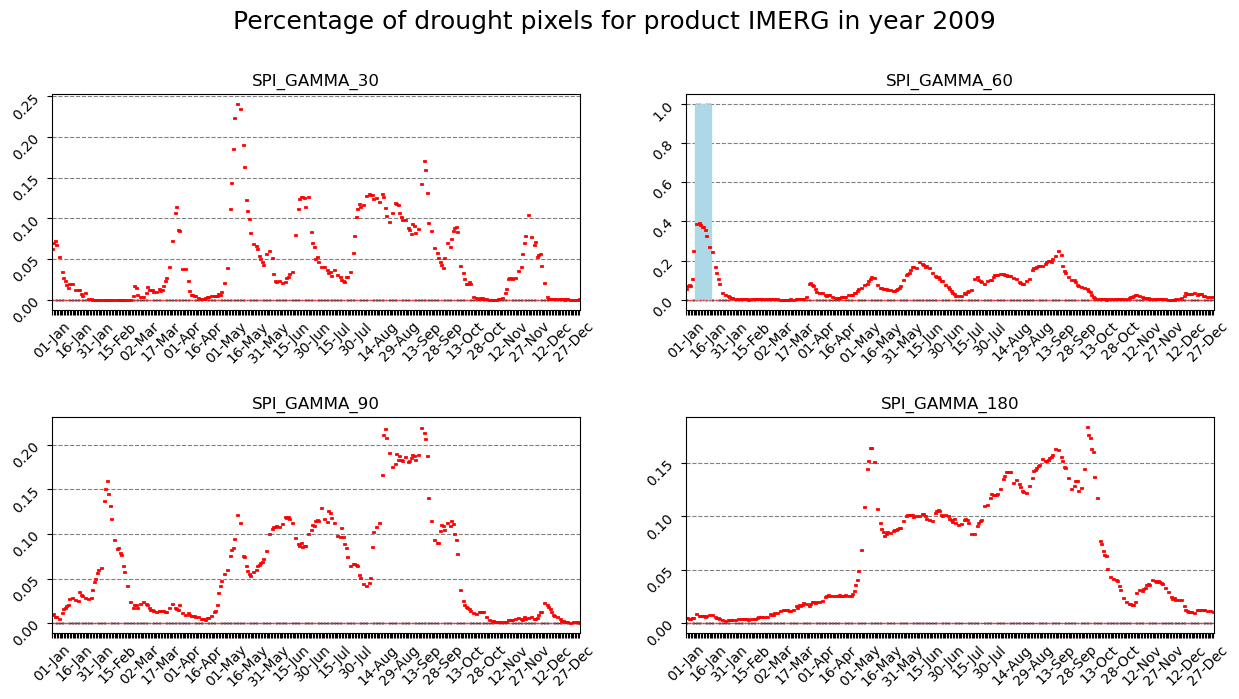

Plotting new product...


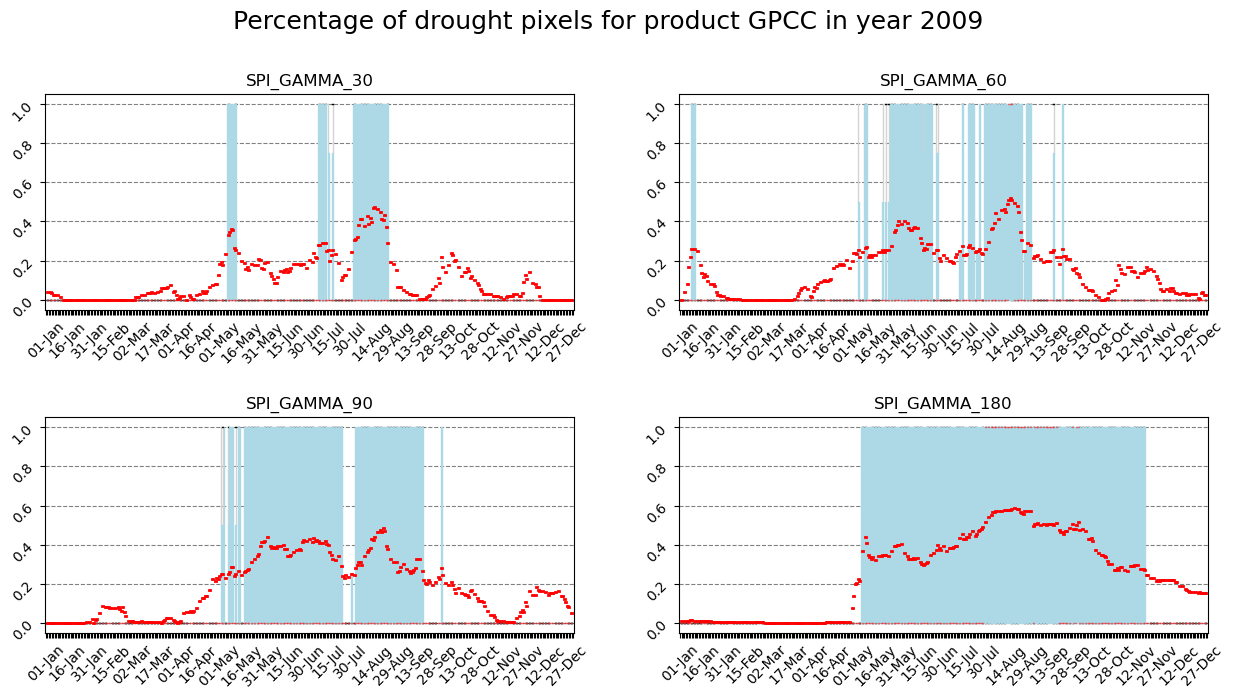

Plotting new product...


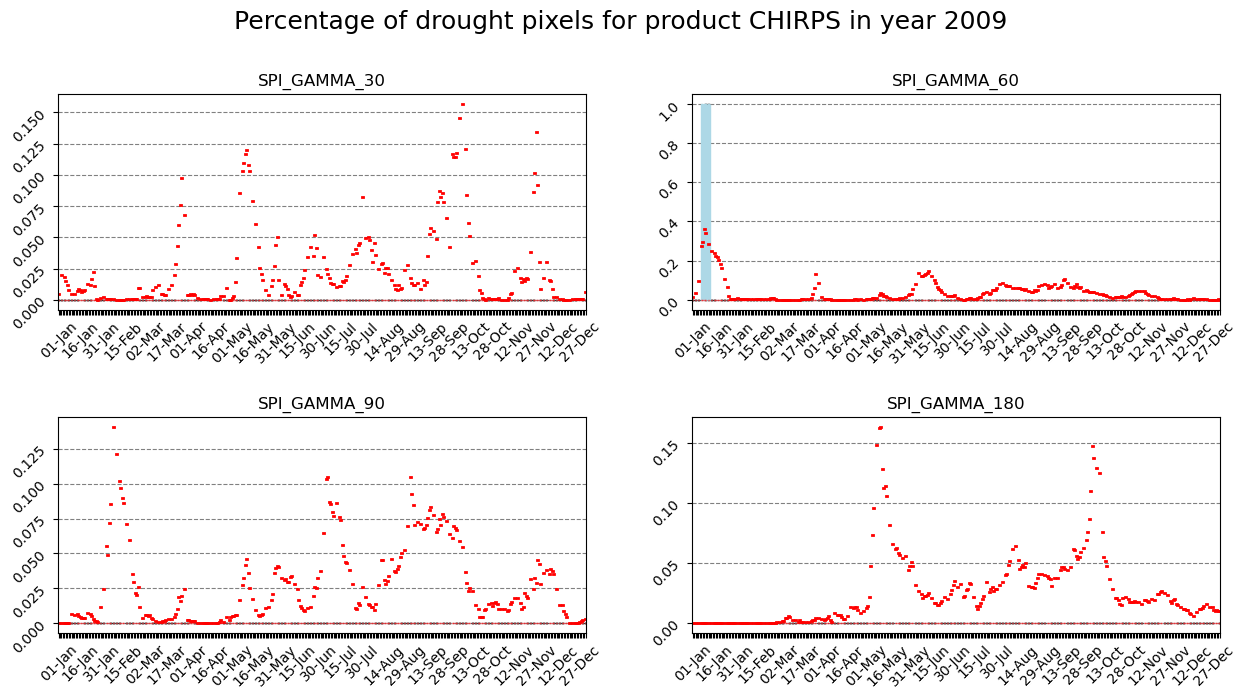

Plotting new product...


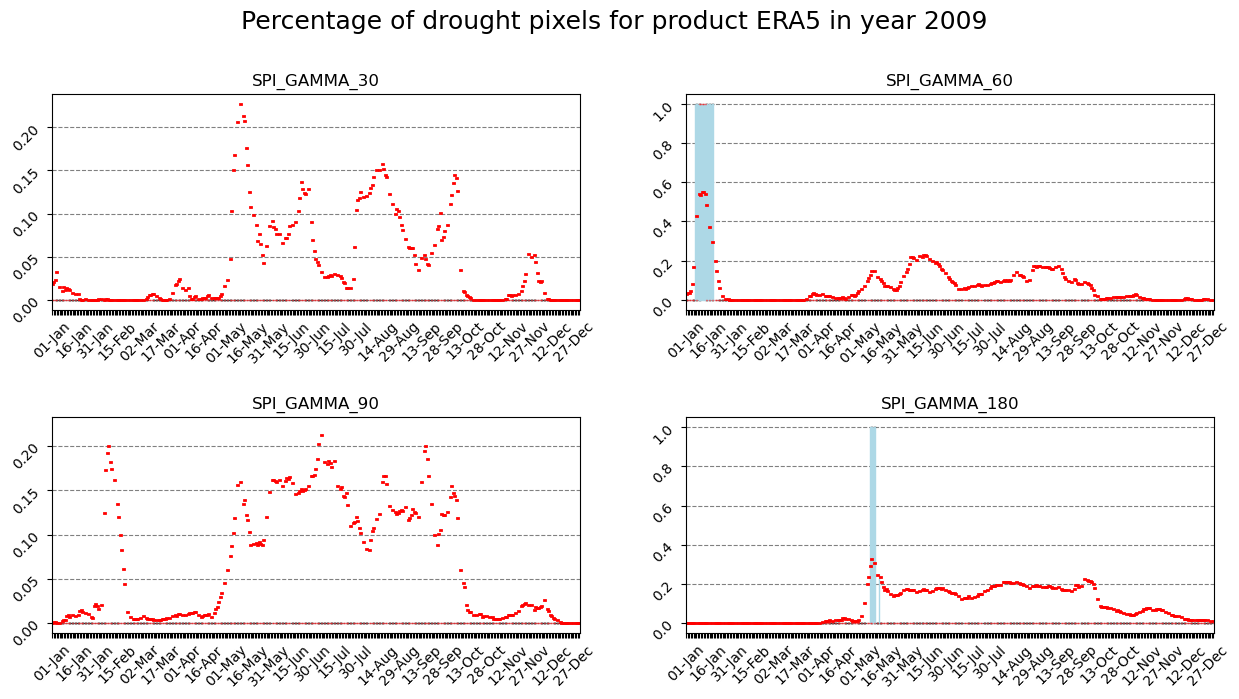

Plotting new product...


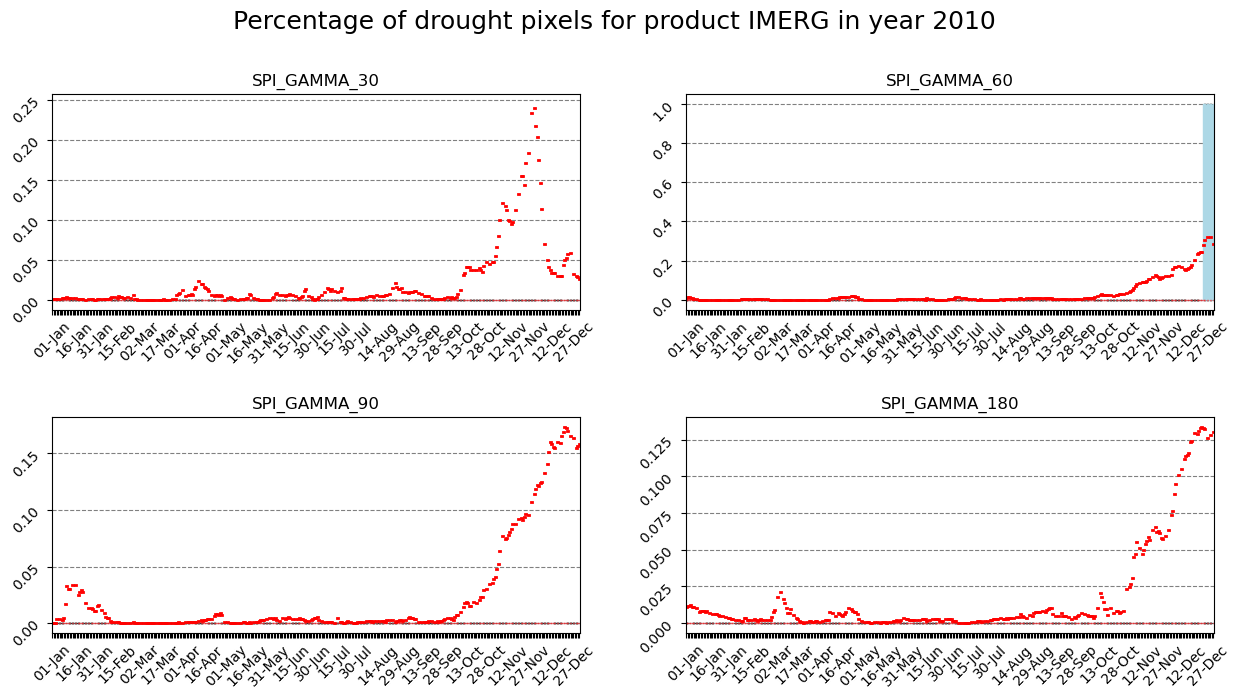

Plotting new product...


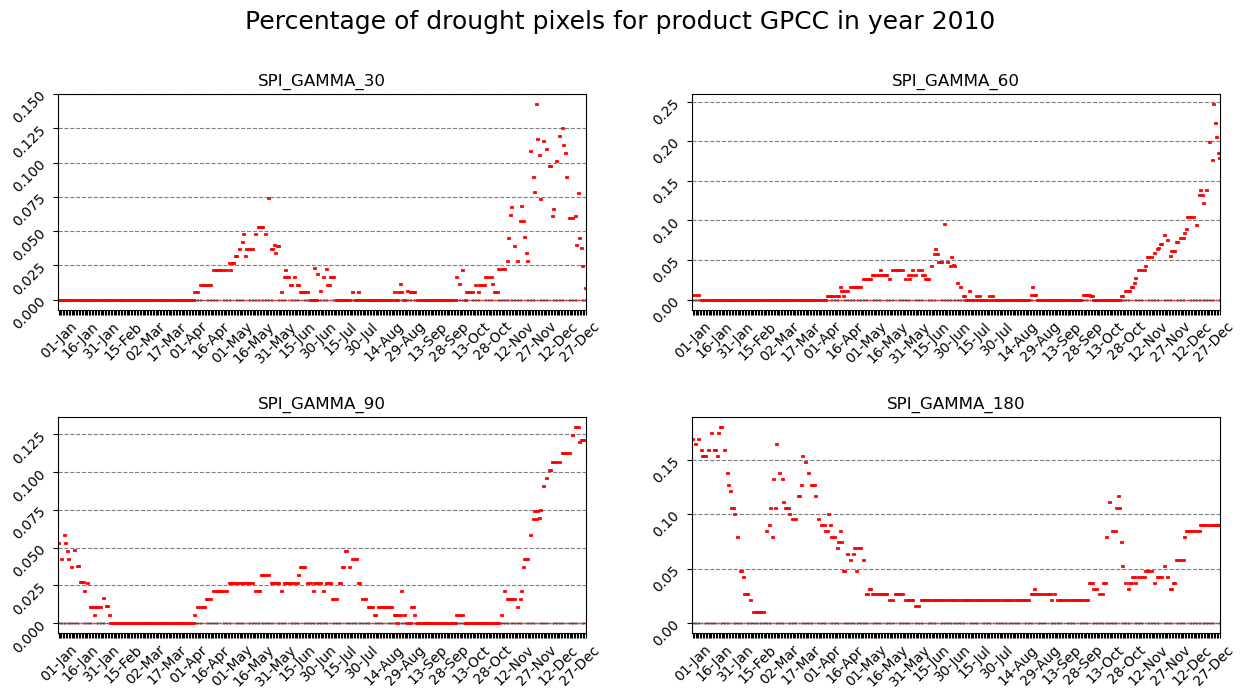

Plotting new product...


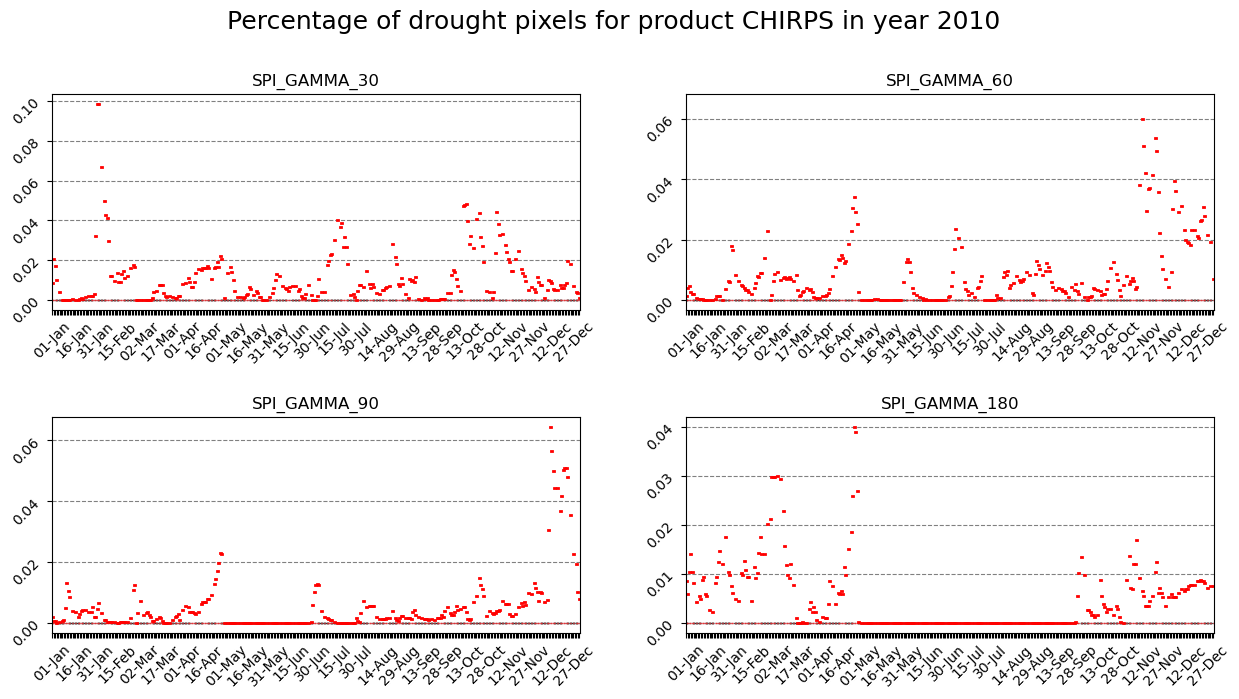

Plotting new product...


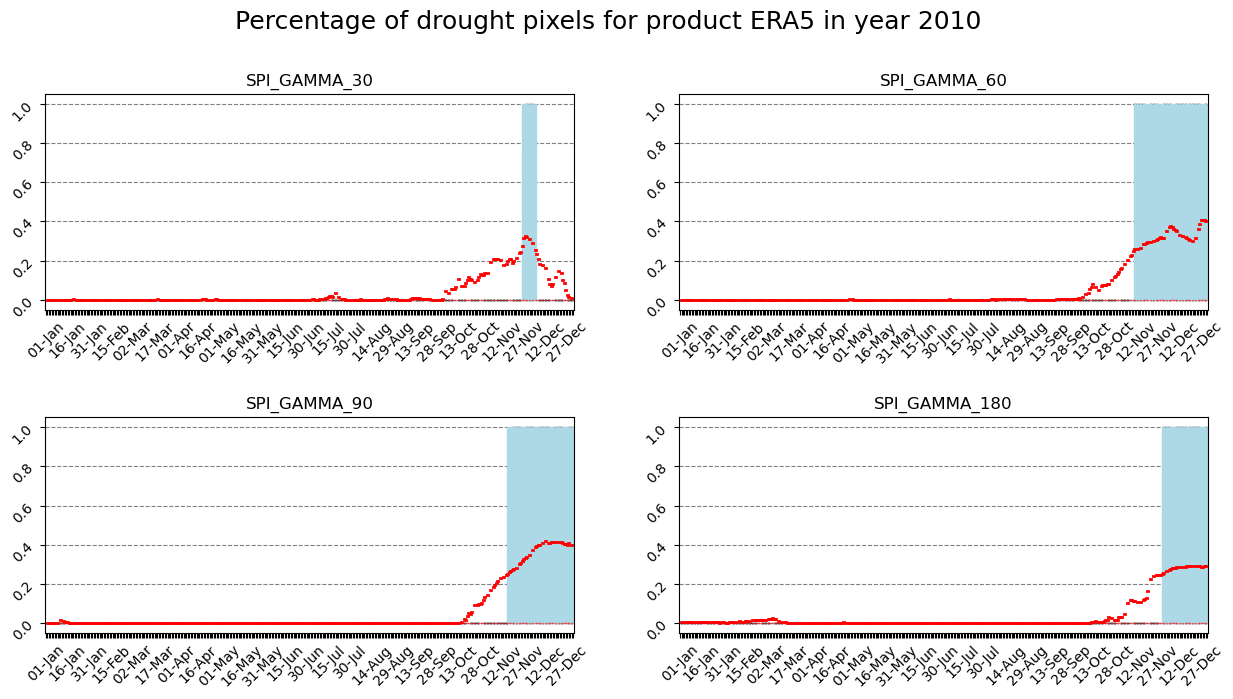

Plotting new product...


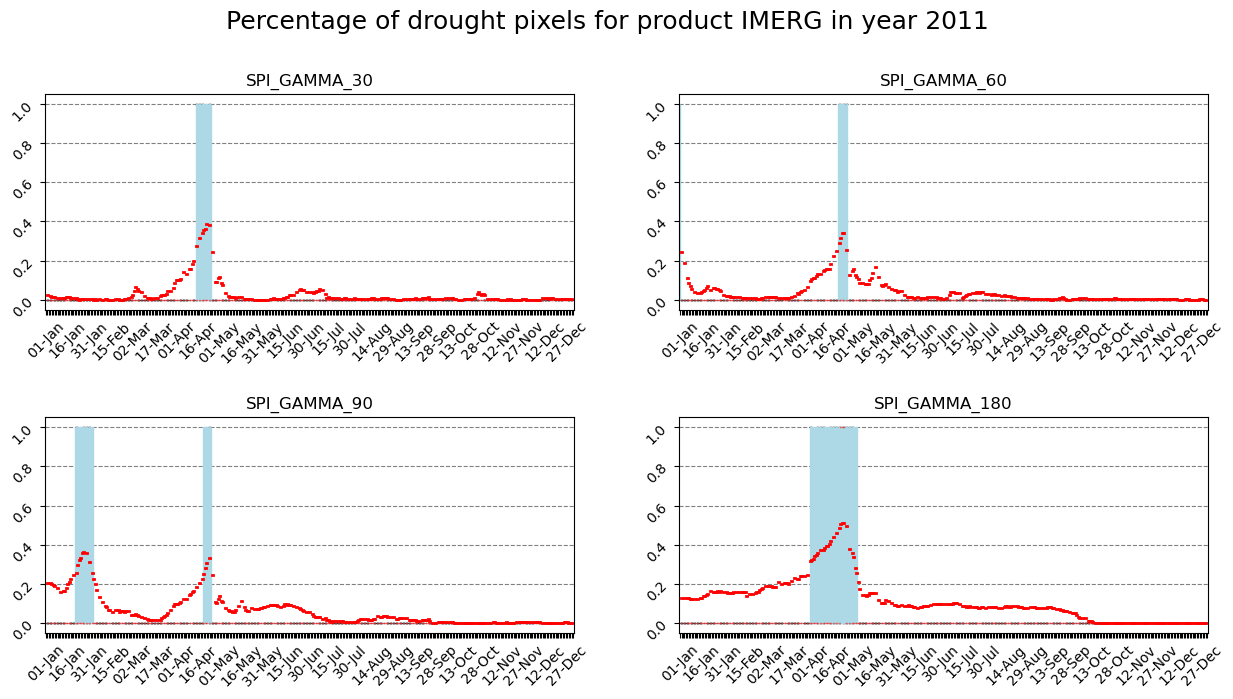

Plotting new product...


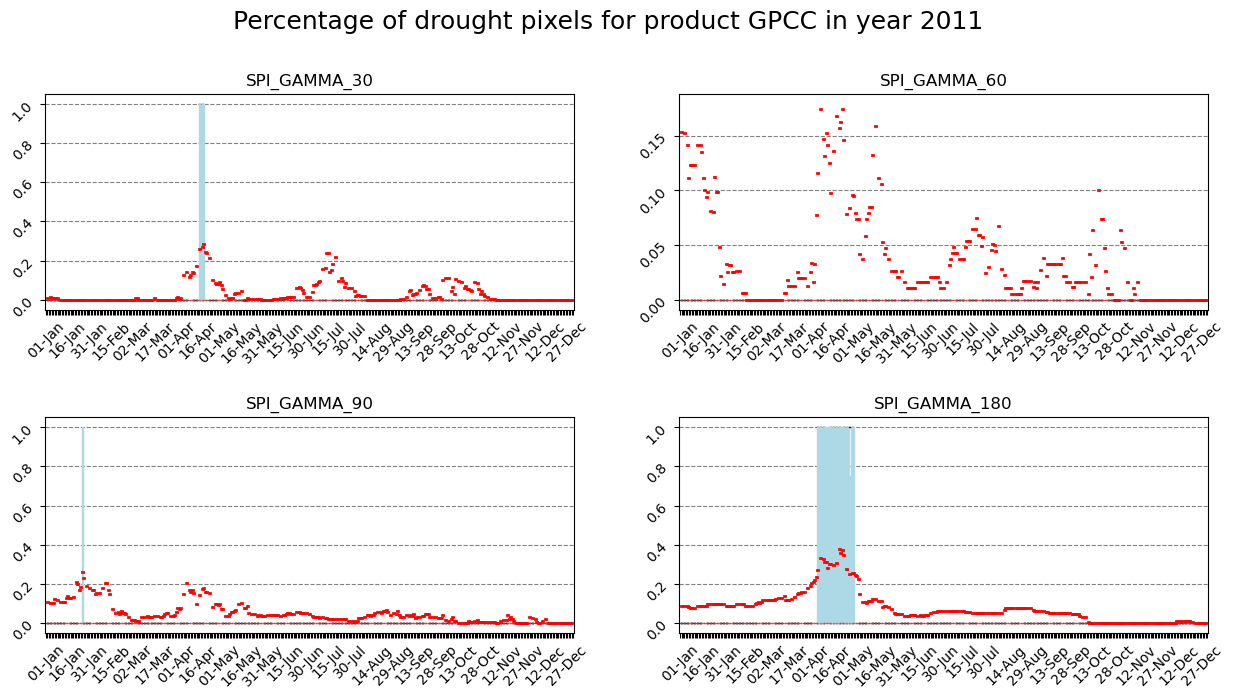

Plotting new product...


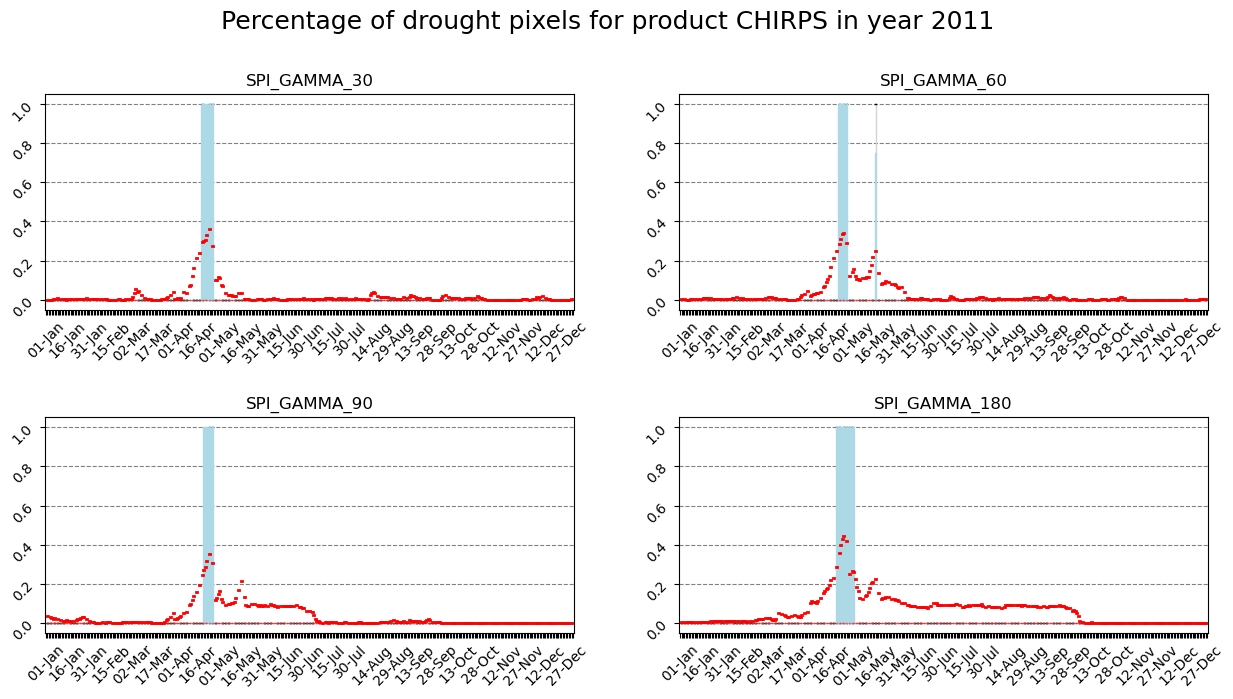

Plotting new product...


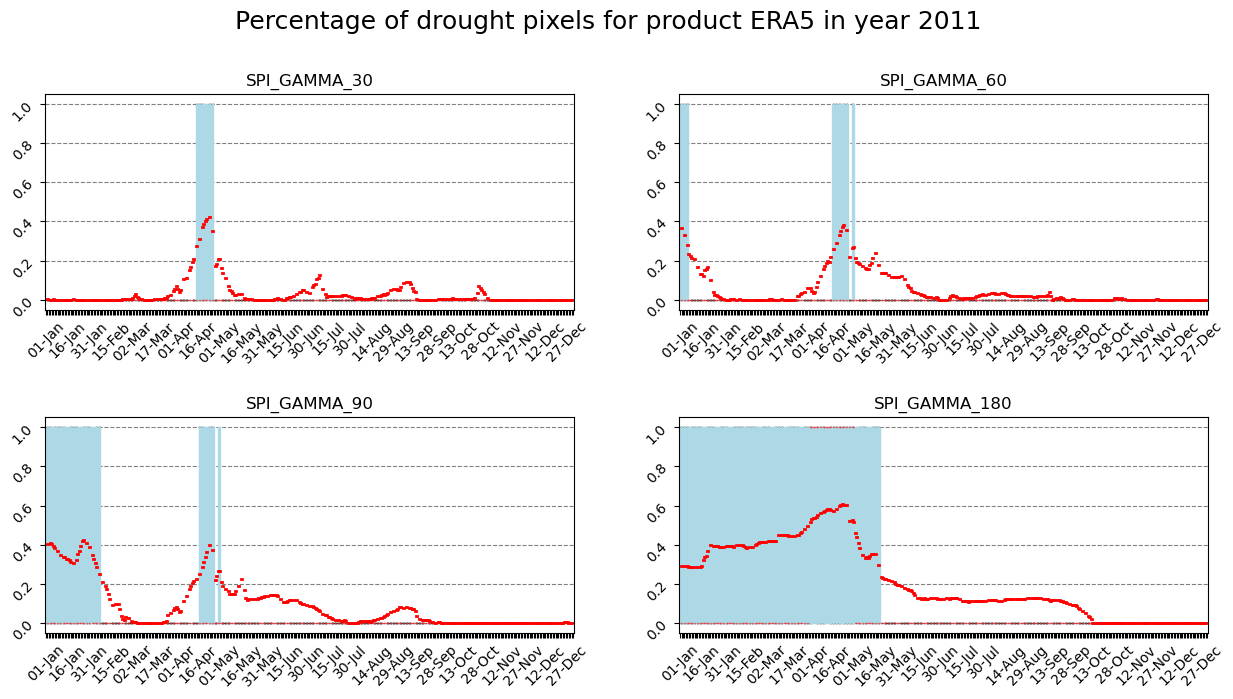

In [94]:
for year in [2009, 2010, 2011]:
    plot_products_drought_pixels(year)